In [2]:
import numpy as np
from scipy.integrate import solve_ivp

In [17]:
test_data = np.array(
    [[0.0,2.0,-0.66],
[1e-07,1.9999999339092924,-0.6617278829802857],
[1.8879154331904427e-07,1.9999998750999044,-0.662882819686148],
[2.7758308663808855e-07,1.9999998162004895,-0.6637676844693259],
[3.8598167014344036e-07,1.9999997442030313,-0.6645725163813525],
[4.943802536487922e-07,1.9999996721310949,-0.6651539268420846],
[6.027788371541441e-07,1.9999996000053553,-0.6655739407846423],
[7.408327113556779e-07,1.9999995080929496,-0.6659445745042282],
[8.788865855572116e-07,1.999999416138648,-0.6661895416703925],
[1.0480716792699878e-06,1.9999993034118768,-0.6663795957844587],
[1.217256772982764e-06,1.9999991906598873,-0.6664940270070598],
[1.4208232778026396e-06,1.9999990549751598,-0.6665731521285883],
[1.6725044441221389e-06,1.9999988872041947,-0.6666230207251571],
[1.924185610441638e-06,1.9999987194244124,-0.6666465084400804],
[2.2657546845392457e-06,1.999998491715907,-0.6666599342366362],
[2.7290943367708123e-06,1.9999981828242983,-0.6666656963397133],
[3.329047990939408e-06,1.9999977828551134,-0.6666674668165088],
[4.301302207136231e-06,1.99999713468448,-0.6666681171016017],
[6.001543708287522e-06,1.9999960011871198,-0.6666687643248209],
[1.0882006133187455e-05,1.9999927475308528,-0.6666705723549496],
[3.4951781332868994e-05,1.9999767008127518,-0.6666794874827251],
[0.00022750998293032132,1.999848319341964,-0.6667508221298181],
[0.00176797559570994,1.99882077259096,-0.667322390794272],
[0.014091700497946887,1.9905684493743092,-0.6719528417590668],
[0.0794859989475419,1.945779902681535,-0.6983984086408459],
[0.1301233851646011,1.909843261858713,-0.7213755831194323],
[0.17946741058810928,1.8736437998155826,-0.7463105361045584],
[0.2229013787543927,1.8407070812107287,-0.7707497344151452],
[0.26545277750272434,1.8073538172207775,-0.7974105318835205],
[0.30289774427758454,1.7770141741758347,-0.8235380590508172],
[0.3395672804887498,1.7463026080163289,-0.8520320857746818],
[0.37182445785314944,1.718376088683236,-0.8799471328121754],
[0.4034024745204532,1.6901174573446665,-0.910379290067827],
[0.4311734180562322,1.664428745950139,-0.9401829877331224],
[0.45835305725298825,1.6384416432509623,-0.9726619864464743],
[0.48357991321370297,1.6134876311920752,-1.0063267116853187],
[0.50570373017163,1.5908665320508628,-1.0391993961451835],
[0.5273491120548689,1.5679923327475305,-1.074997005910059],
[0.5474386045342917,1.5460305020759184,-1.1120824930963074],
[0.5660363037576154,1.5249985192277853,-1.1504019142857926],
[0.5832513383267398,1.5048598276192742,-1.189983954193287],
[0.5991875055376898,1.4855762515902813,-1.23086274498302],
[0.6139415080307905,1.467110361312727,-1.2730744779854561],
[0.6276029551015279,1.4494260192502,-1.3166565527983116],
[0.6402547911815094,1.4324884303497585,-1.3616475448953138],
[0.6519737396221261,1.416264144190773,-1.4080872446198338],
[0.6628307278800176,1.4007210474435512,-1.4560166986122116],
[0.6728912918665817,1.385828349448355,-1.505478249760898],
[0.6822159586841284,1.3715565624802928,-1.556515573188528],
[0.6908606082912334,1.3578774767123283,-1.6091737103692034],
[0.6988768140017544,1.3447641310320657,-1.6634991000786357],
[0.7063121622542243,1.3321907803312678,-1.719539606320462],
[0.7132105523090624,1.320132859678081,-1.7773445444036258],
[0.7196124762450427,1.308566946405319,-1.8369647035179764],
[0.7255552801069423,1.2974707204805271,-1.8984523665402673],
[0.7310734069791427,1.2868229237007107,-1.961861326940006],
[0.7361986228275624,1.2766033181757583,-2.0272469027199027],
[0.7409602258755034,1.2667926447428952,-2.094665945637372],
[0.7453852406179724,1.2573725812700556,-2.1641768477683567],
[0.7494985971783603,1.248325701549499,-2.2358395424680397],
[0.7533232970346098,1.2396354347846528,-2.3097155007207886],
[0.7568805659458668,1.231286025984621,-2.3858677214961137],
[0.7601899949695038,1.22326249736541,-2.4643607158855536],
[0.7632696703797597,1.2155506109241838,-2.5452604839076662],
[0.7661362932859791,1.2081368322742099,-2.6286344831048134],
[0.7688052897143193,1.201008295786299,-2.7145515881638214],
[0.7712909118525957,1.1941527711196647,-2.803082040018862],
[0.7736063311575149,1.1875586310971353,-2.894297384056998],
[0.7757637239564912,1.181214820920298,-2.9882703965684514],
[0.7777743500878275,1.1751108288506504,-3.085074996274912],
[0.7796486252169956,1.1692366580804292,-3.1847861434074662],
[0.7813961872567642,1.1635828000011692,-3.287479721800579],
[0.7830259574036695,1.1581402087231967,-3.3932324042767634],
[0.7845461962598008,1.1529002766911514,-3.5021215026993753],
[0.7859645553723158,1.1478548115810019,-3.6142247975854787],
[0.7872881246304083,1.1429960142068032,-3.729620350830592],
[0.788523475849582,1.1383164574128095,-3.8483863014297404],
[0.7896767028258145,1.1338090660143727,-3.970600641757109],
[0.7907534581914503,1.129467097575904,-4.096340979017082],
[0.7917589873294838,1.1252841239903282,-4.225684283754628],
[0.7926981595646259,1.121254013904092,-4.358706625290687],
[0.7935754968814699,1.117370915825083,-4.495482900829333],
[0.7943952003823247,1.1136292418122464,-4.6360865657016275],
[0.7951611746334473,1.1100236518603932,-4.780589365945991],
[0.7958770500874797,1.1065490388694978,-4.9290610828106995],
[0.7965462037649678,1.1032005140242456,-5.0815693048172434],
[0.7971717783092632,1.0999733926702604,-5.238179235241551],
[0.7977566994896456,1.0968631809593765,-5.398953532599743],
[0.798303692404779,1.093865562567128,-5.563952230814396],
[0.7988152963387128,1.0909763862796293,-5.733232715846412],
[0.7992938784584597,1.088191654008363,-5.906849794593887],
[0.7997416464237627,1.0855075093497317,-6.084855867484568],
[0.800160659952777,1.0829202269622704,-6.2673012027165695],
[0.8005528414466984,1.0804262026742122,-6.454234329087673],
[0.8009199857202813,1.0780219445370862,-6.645702541879604],
[0.8012637689188691,1.0757040648170983,-6.8417525262765455],
[0.8015857566453484,1.073469273268175,-7.0424310677810515],
[0.8018874113864853,1.071314371585826,-7.247785843859046],
[0.8021700992525799,1.0692362494269656,-7.4578662383238745],
[0.8024350961208381,1.0672318818349975,-7.672724153800194],
[0.8026835932214965,1.065298328222174,-7.892414757803461],
[0.8029167022089784,1.0634327330218447,-8.11699708268335],
[0.8031354597942973,1.0616323278169901,-8.34653441851174],
[0.8033408319821691,1.0598944349412553,-8.581094405713047],
[0.8035337179837354,1.0582164722671672,-8.820748757956208],
[0.8037149538646694,1.056595958898688,-9.065572544755465],
[0.8038853159938951,1.0550305213474143,-9.315642986965296],
[0.8040455243360568,1.0535178998758739,-9.571037713960383],
[0.8041962456583673,1.0520559543488772,-9.831832504660333],
[0.8043380966925735,1.0506426690975512,-10.098098545674052],
[0.8044716472991326,1.049276156147928,-10.369899310806773],
[0.8045974236609549,1.0479546562667748,-10.647287206856358],
[0.8047228828827526,1.0466002777742074,-10.947669964070098],
[0.8048356370249128,1.0453495800071606,-11.240748927657798],
[0.8049460980541022,1.044090951022897,-11.552195606451102],
[0.8050513834687156,1.0428579299200578,-11.87472816050233],
[0.8051501536747965,1.0416690501894683,-12.203441616220763],
[0.8052427390542685,1.0405239167830367,-12.537916293666933],
[0.805329677879219,1.0394192768002377,-12.878564275331673],
[0.8054113626772484,1.0383533158120957,-13.225437242099574],
[0.8054881157713845,1.0373248562328714,-13.578395168760123],
[0.8055602415804124,1.0363327300637977,-13.937285703779935],
[0.8056280326046468,1.0353757057313606,-14.301974144111504],
[0.8056917680301886,1.0344525114202316,-14.67234298163293],
[0.8057517139170326,1.0335618387421583,-15.048298147721928],
[0.8058081236722276,1.0327023427540731,-15.429777347609836],
[0.8058612381379541,1.0318726481549214,-15.816756328647205],
[0.8059112853879091,1.0310713611631335,-16.209252319422884],
[0.8059584804318312,1.0302970845599122,-16.607324889425502],
[0.806003024965776,1.029548433833108,-17.01107460311381],
[0.8060451072679218,1.0288240525750612,-17.42064006596673],
[0.8060849022869994,1.0281226258892084,-17.836193959708254],
[0.8061225719399653,1.0274428909386966,-18.25793870998127],
[0.8061582655930959,1.0267836444805267,-18.686102197840935],
[0.8061921206888936,1.0261437475142807,-19.120933828123647],
[0.8062242634785063,1.0255221273324704,-19.56270119136445],
[0.8062548098077414,1.0249177776130296,-20.01168728556202],
[0.8062838659250109,1.0243297569501086,-20.46818835518131],
[0.8063115292810442,1.023757186293805,-20.932512288683277],
[0.8063378892983449,1.0231992457020682,-21.404977486440973],
[0.8063630280964295,1.02265517071406,-21.885912111859113],
[0.8063870211667892,1.022124248534227,-22.37565368184625],
[0.8064099379922256,1.0216058142294808,-22.87454889566234],
[0.8064332129269897,1.0210671824698996,-23.415859338233957],
[0.8064542230889225,1.0205697867894286,-23.93780537453502],
[0.8064754760773577,1.0200551131026505,-24.50158481750739],
[0.8064958704025912,1.0195495851781915,-25.080259769604368],
[0.806515361134339,1.0190550529170226,-25.671724921067543],
[0.8065339931834336,1.018571166982502,-26.276247017682312],
[0.8065518153953488,1.0180974194231835,-26.894322282763632],
[0.8065688735763878,1.017633318966761,-27.526481425204558],
[0.8065852102446696,1.0171784028545185,-28.173273666599023],
[0.8066008648919681,1.0167322353526864,-28.835266384077478],
[0.8066158742532314,1.016294405478299,-29.51304604156207],
[0.8066302725495086,1.0158645248850757,-30.207219247400143],
[0.8066440917052938,1.015442225950669,-30.91841385729804],
[0.8066573615426348,1.0150271600658352,-31.647280086068747],
[0.8066701099556052,1.0146189960792151,-32.39449167078826],
[0.806682363066894,1.0142174188981652,-33.16074705685373],
[0.8066941453685733,1.0138221282307693,-33.94677060262618],
[0.8067054798493422,1.0134328374387942,-34.753313833478344],
[0.806716388109433,1.0130492725011497,-35.58115672464866],
[0.8067268904645551,1.0126711710772587,-36.431109010736556],
[0.8067370060404178,1.0122982816483606,-37.30401154907964],
[0.8067467528583381,1.0119303627475542,-38.20073769453538],
[0.8067561479137714,1.0115671822370713,-39.12219476586634],
[0.8067652072473824,1.0112085166698832,-40.069325501649935],
[0.8067739460102994,1.010854150695417,-41.04310958623011],
[0.8067823785240243,1.0105038765083878,-42.0445652421551],
[0.8067905183350302,1.0101574933574122,-43.074750830738544],
[0.8067983782653173,1.009814807077184,-44.1347665506914],
[0.8068059704588155,1.0094756296621947,-45.22575617873276],
[0.8068133064240246,1.0091397788792589,-46.348908847416496],
[0.8068203970736513,1.0088070778970526,-47.50546092279556],
[0.8068272527610807,1.0084773549504573,-48.69669791998605],
[0.8068338833142442,1.0081504430242667,-49.92395650095818],
[0.8068402980669961,1.0078261795598642,-51.18862653853931],
[0.8068465058883054,1.0075044061784308,-52.492153266567975],
[0.8068525152093174,1.0071849684259215,-53.836039492504966],
[0.8068583340485833,1.0068677155320591,-55.2218478987272],
[0.8068639700355964,1.0065525001825553,-56.65120343519675],
[0.8068694304328007,1.0062391783016253,-58.125795816649244],
[0.8068747221559764,1.0059276088562823,-59.64738206909305],
[0.8068798517934641,1.0056176536620745,-61.21778921701444],
[0.8068848256241004,1.0053091772018838,-62.83891706020735],
[0.8068896508919997,1.0050019652976934,-64.51319141610028],
[0.8068943307733053,1.0046960485276708,-66.2417882214548],
[0.8068988730794425,1.0043911441464575,-68.0277140854948],
[0.8069032807960513,1.004087274267921,-69.87231978758015],
[0.8069075609758112,1.0037841705486563,-71.77878648703579],
[0.8069117164001487,1.003481848900855,-73.74864280934511],
[0.8069157534498698,1.0031800536190263,-75.78526098296553],
[0.8069196747132024,1.0028787950721878,-77.89035917871301],
[0.8069234859750457,1.0025778285874385,-80.06751855491359],
[0.8069271896416806,1.002277159539371,-82.31865970728775],
[0.8069307909681566,1.0019765528594844,-84.64759177901225],
[0.8069342921900127,1.0016760093862704,-87.0564519017919],
[0.8069376980901165,1.0013753023747352,-89.54929760649904],
[0.8069410107442995,1.0010744285042228,-92.12849802271586],
[0.8069442345136504,1.0007731682062497,-94.79838088794556],
[0.8069473713249935,1.0004715143107834,-97.56156421316277],
[0.8069504251618888,1.0001692533873805,-100.42266936864013],
[0.8069533978124203,0.9998663746700017,-103.3845816440057],
[0.806956292921542,0.9995626699235888,-106.45224120052106],
[0.806959112148391,0.9992581249895672,-109.62882064215303],
[0.8069618588336187,0.9989525359704329,-112.91960594333668],
[0.8069645345167037,0.9986458854750927,-116.32807882262377],
[0.8069671422643279,0.9983379731557591,-119.85990015410539],
[0.8069696835050499,0.9980287785142448,-123.51888443696656],
[0.8069721610584509,0.9977181040267674,-127.31109875444201],
[0.8069745762503766,0.9974059261815501,-131.24071608286877],
[0.8069769316771627,0.9970920496061876,-135.3142434458193],
[0.8069792285696139,0.996776447842254,-139.5362401656531],
[0.8069814693220403,0.9964589270424425,-143.91368955747805],
[0.8069836556270845,0.9961393762374607,-148.45274399536507],
[0.8069857883224453,0.9958178051203268,-153.15799974080863],
[0.8069878698131706,0.9954939809205925,-158.03779013948827],
[0.8069899016101058,0.9951677904876944,-163.09902890180828],
[0.8069918844671478,0.9948392379758236,-168.3469910191926],
[0.8069938205244116,0.9945080918273955,-173.79093100843107],
[0.8069957111317977,0.9941742364406938,-179.4386131530378],
[0.8069975569675747,0.9938376706937423,-185.29607248677087],
[0.8069993599423433,0.9934981628425373,-191.37360033572006],
[0.8070011212650358,0.993155594263229,-197.67991648829107],
[0.8070028415458921,0.9928099587428065,-204.22190772647969],
[0.8070045224960078,0.9924610230480932,-211.01103185456185],
[0.8070061652005881,0.9921086649724302,-218.057082055078],
[0.8070077702088384,0.9917528733307583,-225.36790024203404],
[0.8070093390578491,0.9913934121766407,-232.95625610650265],
[0.8070108727240107,0.9910301551644746,-240.8331487030998],
[0.8070123717018748,0.9906630862003257,-249.0074915566087],
[0.8070138373762726,0.9902919654599134,-257.4935293898961],
[0.8070152706277008,0.9899166619030222,-266.30361600734886],
[0.8070166719018379,0.9895371545422542,-275.4478677163686],
[0.807018042449865,0.9891531985538954,-284.94218739918676],
[0.8070193830675995,0.9887646576434563,-294.80045093889134],
[0.8070206941570611,0.9883715059026411,-305.03412512707405],
[0.8070219768517538,0.9879734924161724,-315.6609766237243],
[0.807023231872568,0.9875704750670102,-326.6965914926302],
[0.807024459582546,0.9871624229605521,-338.1539532814416],
[0.8070256610112672,0.986749078014747,-350.05292337467375],
[0.8070268368131885,0.9863302917091291,-362.41100949526094],
[0.8070279873165651,0.9859060280624533,-375.2428991063551],
[0.8070291134589287,0.9854760207557999,-388.57080780585],
[0.8070302158357116,0.985040114267995,-402.41440276139207],
[0.8070312947441216,0.9845982673977376,-416.79028602214095],
[0.8070323510399284,0.9841502045145787,-431.7233190194262],
[0.8070333852660135,0.9836957624779756,-447.2355957987288],
[0.8070343979484346,0.9832347758225944,-463.3500750280456],
[0.8070353892678961,0.9827672347587767,-480.0848886618934],
[0.8070363600705376,0.982292811225781,-497.4702661888272],
[0.8070373108381168,0.9818113307978094,-515.532016176418],
[0.8070382420376893,0.981322616526631,-534.296955011183],
[0.8070391538270701,0.9808266523378995,-553.7864475623478],
[0.8070400469613632,0.9803230928118404,-574.0356283091311],
[0.8070409218693603,0.9798117511462262,-595.0746426603574],
[0.8070417789671894,0.9792924376766955,-616.9348161846868],
[0.8070426183929856,0.9787651298605944,-639.6412940682025],
[0.8070434408230704,0.9782294625802042,-663.2349434304568],
[0.8070442466403981,0.9776852353526531,-687.7509797313572],
[0.8070450362169692,0.977132244474178,-713.2260003192849],
[0.8070458096739948,0.9765704606764406,-739.6895721336233],
[0.8070465676192903,0.975999496687401,-767.1892634650542],
[0.8070473103959872,0.9754191369375024,-795.7662183773533],
[0.8070480383377029,0.9748291622532242,-825.4631990849188],
[0.8070487515510845,0.9742295363052641,-856.3149462051631],
[0.807049450584096,0.9736198470665054,-888.3768629415041],
[0.8070501357451358,0.9729998623561148,-921.6970276725374],
[0.8070508073343042,0.9723693459770255,-956.3254137572376],
[0.8070514654457025,0.9717282541181285,-992.3028173987929],
[0.8070521105747646,0.971076147223378,-1029.6938043391592],
[0.8070527429994755,0.9704127748388812,-1068.5545658741503],
[0.8070533629905545,0.9697378820472855,-1108.94351282586],
[0.8070539706312778,0.9690514170431836,-1150.908531704607],
[0.807054566370772,0.9683529097616982,-1194.5249062427915],
[0.8070551504602885,0.9676420896563991,-1239.8583225094046],
[0.8070557231446907,0.9669186812298145,-1286.9770667517746],
[0.8070562844978953,0.9661826240662065,-1335.937330522146],
[0.807056834928036,0.9654334143736499,-1386.8269387010657],
[0.8070573746627743,0.9646707595126501,-1439.7226931341181],
[0.8070579039241335,0.9638943613577815,-1494.7044425856034],
[0.8070584227779194,0.9631041501513008,-1551.83811046751],
[0.8070589315958306,0.9622995848805554,-1611.2262008922698],
[0.8070594305846353,0.9614803486051632,-1672.9585340924536],
[0.8070599199461054,0.9606461183102828,-1737.1285017623625],
[0.8070603997389985,0.9597968140312103,-1803.8134362891585],
[0.8070608703025072,0.9589318537254088,-1873.1330298059556],
[0.8070613318248262,0.9580508937069485,-1945.1923554158],
[0.8070617844897077,0.9571535835637912,-2020.100674086374],
[0.8070622283497657,0.9562398321067448,-2097.9486998733573],
[0.8070626637150892,0.9553090120934782,-2178.87625851528],
[0.8070630907573039,0.9543607503762647,-2263.0063020415414],
[0.8070635096440716,0.9533946663567606,-2350.46669523207],
[0.8070639204226355,0.9524106564251426,-2441.363856201109],
[0.8070643233769395,0.95140804355859,-2535.861204956204],
[0.8070647186637795,0.9503864221186317,-2634.1026611241487],
[0.8070651064364031,0.9493453782072891,-2736.237910266747],
[0.8070654867373416,0.9482847943910199,-2842.391810963991],
[0.8070658598269798,0.9472039388146294,-2952.755446530839],
[0.8070662258487983,0.9461023699601884,-3067.497340034621],
[0.8070665849430912,0.944979637144808,-3186.792785463201],
[0.8070669371482435,0.9438356074612563,-3310.788309739842],
[0.8070672827033499,0.9426694886325804,-3439.7074476841744],
[0.8070676217399002,0.9414807994573563,-3573.7476097669705],
[0.8070679543865146,0.9402690485495829,-3713.114162602577],
[0.8070682806779158,0.9390340855888728,-3857.9791131693123],
[0.8070686008339097,0.9377750516695843,-4008.6040876044003],
[0.8070689149751584,0.9364914216190197,-4165.220436980075],
[0.8070692232197327,0.9351826589282143,-4328.0688677787075],
[0.8070695255991106,0.9338485935775898,-4497.351374201058],
[0.8070698223155808,0.932488293114074,-4673.37432368673],
[0.8070701134800027,0.9311011835432613,-4856.408975456794],
[0.807070399200891,0.9296866782270604,-5046.737598363126],
[0.8070706795068394,0.9282445847452726,-5244.597511130882],
[0.8070709545841944,0.9267738893559282,-5450.34767285136],
[0.8070712245349211,0.9252739637311427,-5664.3063080166185],
[0.8070714894588579,0.9237441654085853,-5886.804609230594],
[0.8070717493820272,0.9221842763648201,-6118.121550552195],
[0.807072004476239,0.920593192870733,-6358.677962664323],
[0.8070722548353712,0.9189702259737083,-6608.8473937427025],
[0.8070725005513696,0.9173146708780352,-6869.0186827234165],
[0.807072741647958,0.9156262801448632,-7139.519982516222],
[0.8070729782836692,0.913903850241287,-7420.844982046999],
[0.8070732105450149,0.9121466243722177,-7713.432470347733],
[0.8070734385167484,0.9103538279306391,-8017.739287011137],
[0.8070736622205331,0.908525179506248,-8334.151723654884],
[0.8070738818027581,0.9066593646282902,-8663.249357698238],
[0.8070740973432143,0.9047555503334361,-9005.548009269232],
[0.8070743089200909,0.9028128835639861,-9361.584835583206],
[0.8070745165532014,0.9008310434662039,-9731.814963470519],
[0.807074720377813,0.8988085919348797,-10116.919344088257],
[0.8070749204675777,0.8967446101769115,-10517.504878073974],
[0.8070751168946859,0.8946381566423318,-10934.203726755488],
[0.8070753096772877,0.8924888644244899,-11367.5526579741],
[0.8070754989404544,0.890295157219708,-11818.352442170037],
[0.8070756847522239,0.8880560191193906,-12287.31784653041],
[0.8070758671793002,0.8857704083296133,-12775.193596981298],
[0.8070760462383361,0.8834379038594486,-13282.613482817795],
[0.8070762220450481,0.8810567743902055,-13810.520124892055],
[0.8070763946623367,0.8786258936185973,-14359.75627459341],
[0.8070765641518843,0.8761441056511521,-14931.200286681329],
[0.8070767305289962,0.8736109255879747,-15525.601513567042],
[0.8070768939008014,0.8710244475329696,-16144.070823540435],
[0.8070770543254968,0.8683834190371283,-16787.603149528753],
[0.807077211860168,0.8656865536378847,-17457.23583642641],
[0.8070773665189088,0.8629332904145397,-18153.856250294048],
[0.8070775184009622,0.860121525950449,-18878.775251691593],
[0.8070776675602197,0.857249862801709,-19633.16918200675],
[0.807077814049559,0.8543168641782168,-20418.26504595704],
[0.8070779578819882,0.8513218780846504,-21235.11554450676],
[0.8070780991495089,0.8482625764225524,-22085.26987420026],
[0.8070782379020736,0.8451373939716357,-22970.121262602566],
[0.8070783741887112,0.8419447196701004,-23891.12365554651],
[0.8070785080214615,0.8386837915592192,-24849.52853757439],
[0.8070786394856798,0.8353520243674548,-25847.1699962806],
[0.8070787686277193,0.831947657258043,-26885.701465278304],
[0.8070788954930943,0.8284688755477323,-27966.849430108276],
[0.8070790200929886,0.8249147833664104,-29092.10539926523],
[0.8070791425066628,0.8212824989364852,-30263.645229836926],
[0.8070792627771896,0.8175700313595199,-31483.435830527553],
[0.8070793809468819,0.8137753258958228,-32753.532410063275],
[0.8070794970261779,0.8098973220379383,-34075.71777890839],
[0.8070796110887595,0.8059327932414644,-35452.57957864816],
[0.8070797231747202,0.8018794753300187,-36886.464253809034],
[0.8070798333234704,0.7977350276202729,-38379.82558027959],
[0.8070799415448141,0.793498185015318,-39934.80207565637],
[0.8070800479073417,0.7891653160674316,-41554.48014454289],
[0.8070801524484582,0.7847338282384833,-43241.66853741575],
[0.8070802552049605,0.7802010361595135,-44999.307365975335],
[0.8070803561861367,0.7755654173914464,-46829.97274024813],
[0.807080455455952,0.7708228593110079,-48737.35910062269],
[0.80708055304941,0.7659703695294229,-50724.84252076112],
[0.8070806490009812,0.7610048413786756,-52795.96121004901],
[0.8070807433195695,0.755924424181911,-54953.83453429425],
[0.8070808360649703,0.7507244254006573,-57202.90417608827],
[0.8070809272700782,0.7454013580714013,-59547.248854606616],
[0.8070810169673338,0.7399515921318964,-61991.14953465796],
[0.8070811051654111,0.7343728514102023,-64538.40767980909],
[0.8070811919203944,0.7286597325430124,-67194.39266797098],
[0.8070812772633813,0.7228081254196396,-69964.06362295565],
[0.8070813612251021,0.7168137370836337,-72852.63534617102],
[0.807081443814195,0.7106737291724851,-75864.77797078276],
[0.807081525083515,0.7043818090083025,-79007.02768216305],
[0.8070816050627154,0.6979330638083321,-82285.46320893207],
[0.8070816837811845,0.6913223414001262,-85706.492121546],
[0.8070817612477847,0.6845460434740134,-89275.91101878432],
[0.807081837512679,0.6775967364370279,-93001.74871352492],
[0.8070819126045059,0.6704684455680529,-96891.53537945802],
[0.8070819865517697,0.6631548732683785,-100953.23377260836],
[0.80708205936393,0.6556513649889805,-105194.13586577623],
[0.8070821310891071,0.6479489770482749,-109624.2233133227],
[0.8070822017554963,0.6400402827538911,-114252.95636074644],
[0.8070822713913415,0.631917403504787,-119090.38166623174],
[0.8070823400249616,0.623571969071556,-124147.18055660042],
[0.8070824076632084,0.6149978655458779,-129432.98634405184],
[0.8070824743573211,0.6061828990718725,-134961.5352414252],
[0.8070825401361623,0.5971169183390672,-140745.76606417066],
[0.8070826050290344,0.587789034458195,-146799.52857946194],
[0.8070826690657391,0.5781875426530564,-153137.67362106455],
[0.8070827322567746,0.5683030084889136,-159774.00531688295],
[0.8070827946540949,0.5581187404272183,-166727.70458205606],
[0.807082856289749,0.5476199471943783,-174017.32695485375],
[0.807082917197019,0.5367905027521493,-181662.9880529594],
[0.8070829774106124,0.5256127633705782,-189686.56247596527],
[0.8070830369485253,0.5140709896280371,-198109.24116342625],
[0.8070830958684204,0.502140290326091,-206959.6642432224],
[0.8070831542113199,0.4897968904176089,-216266.64708650098],
[0.8070832120215301,0.47701418188087075,-226062.1345221854],
[0.8070832693473229,0.46376219033004995,-236381.75658797906],
[0.807083326224788,0.450011109677423,-247262.17156253627],
[0.8070833827310119,0.4357179493389813,-258751.81047108627],
[0.8070834389333411,0.4208375440424169,-270902.5741184098],
[0.8070834949096957,0.40531685554997693,-283774.63605225587],
[0.8070835507518599,0.3890927125873642,-297438.7356671742],
[0.8070836065544884,0.372093511199802,-311975.1956304088],
[0.8070836623571169,0.35425702832985895,-327458.66021630133],
[0.8070837181597454,0.3355284933517416,-343958.88873786875],
[0.807083773962374,0.3158491159212153,-361550.1947409667],
[0.8070838297650025,0.29515583215737856,-380311.4165005702],
[0.8070838886018,0.27216469280844136,-401451.62042772735],
[0.8070839474385976,0.24788624901634318,-424087.3425761476],
[0.8070840062753951,0.22222939092408434,-448325.2097522752],
[0.8070840651121927,0.1950966371581077,-474274.9442561462],
[0.8070841414501845,0.1575223068444993,-510676.8681029571],
[0.8070842097400696,0.12145640562907378,-546037.1250784463],
[0.80708426155608,0.09242661507521512,-574732.8836744659],
[0.8070843111503171,0.06320958106797604,-603770.914831494],
[0.8070843585739459,0.03388881161514137,-633020.4762084406],
[0.8070844036140333,0.004726108949454098,-662170.2417121882],
[0.8070844462666341,-0.024128111506640584,-691019.7443806812],
[0.8070844869514298,-0.05282115894208279,-719668.3474430678],
[0.8070845259985556,-0.0814757699268252,-748191.7939049025],
[0.8070845636579451,-0.11018496488147085,-776635.3636418482],
[0.8070846001271127,-0.13902339816623863,-805024.0424053343],
[0.8070846355678891,-0.16805421647440394,-833368.439059027],
[0.8070846701170867,-0.19733347765941572,-861668.3471118979],
[0.8070847038937102,-0.22691324291051218,-889914.9678523489],
[0.807084737004121,-0.25684394710195185,-918092.3261194922],
[0.8070847695558651,-0.28718577635111514,-946186.7635157509],
[0.807084801631344,-0.31798318477145726,-974161.9983522112],
[0.8070848333201415,-0.34929369815733535,-1001984.6256596618],
[0.8070848647120598,-0.38118159525257506,-1029616.0103521097],
[0.8070848959097663,-0.4137310527755764,-1057020.6941317862],
[0.8070849270038416,-0.44702046616599356,-1084141.0450927727],
[0.8070849581063579,-0.4811575742293773,-1110922.4204268937],
[0.8070849892088743,-0.5161200923383399,-1137188.257091319],
[0.8070850207619584,-0.5524131306991349,-1163117.7805319736],
[0.8070850523150426,-0.5895102198987783,-1188117.0488280624],
[0.8070850851779585,-0.6289666027254355,-1212923.2103068393],
[0.8070851180408745,-0.6692139477649106,-1236208.1627571727],
[0.8070851540118876,-0.7141096936548674,-1259618.3940975023],
[0.8070851929725467,-0.7636335931086125,-1282095.4957688635],
[0.8070852352917367,-0.818339417278016,-1302560.4162963293],
[0.8070852738546873,-0.8688639959841788,-1317117.6988267177],
[0.807085305757848,-0.9110322789036003,-1325882.1006091665],
[0.8070853362264643,-0.9515195480987692,-1331250.2214112412],
[0.8070853656040398,-0.9906684202441292,-1333475.7574909849],
[0.8070853936139603,-1.0280156619039582,-1332770.3298072794],
[0.8070854206196535,-1.0639683800076343,-1329383.3029641688],
[0.8070854468630487,-1.0987841630483357,-1323482.847041569],
[0.8070854725344152,-1.1326586457649612,-1315185.9455577834],
[0.8070854977958868,-1.1657532130570523,-1304570.3198055439],
[0.8070855227671728,-1.198174161007804,-1291695.0969929425],
[0.8070855475651505,-1.2300230823377445,-1276594.8565362983],
[0.8070855723113695,-1.2614042620877464,-1259276.0353059527],
[0.8070855971088048,-1.2923932416264334,-1239735.8886795624],
[0.8070856219062401,-1.3228714496487153,-1218096.9453875339],
[0.8070856471908977,-1.353369991642778,-1193983.404732597],
[0.8070856724755553,-1.383234037193347,-1167932.224825207],
[0.8070856989290726,-1.413748279324641,-1138764.9934657596],
[0.8070857253825898,-1.443467104970849,-1107827.850190714],
[0.8070857542874035,-1.4749784904084295,-1072238.410636167],
[0.8070857831922171,-1.505437439000114,-1035054.1717396936],
[0.8070858185031815,-1.5411583367755328,-987883.1440329507],
[0.8070858538141459,-1.5751869194183672,-939290.3262850416],
[0.8070858860531362,-1.6047421818541976,-894128.0587820663],
[0.8070859143349457,-1.629465454573382,-854198.0561619865],
[0.8070859419916997,-1.6525492044090588,-815118.388948791],
[0.8070859687044575,-1.6738208623534985,-777547.8708306721],
[0.80708599434651,-1.6932997983494755,-741815.5310193456],
[0.8070860192121919,-1.7113193029142977,-707616.543705852],
[0.8070860435203628,-1.7281192727215295,-674731.2674632171],
[0.8070860674141934,-1.743861155641873,-643032.0690863997],
[0.8070860910084663,-1.7586704919631935,-612421.8661762904],
[0.8070861144034004,-1.7726502644777724,-582818.6380387378],
[0.8070861376684263,-1.7858747900648981,-554177.0551420767],
[0.8070861608715595,-1.7984101123009735,-526451.5425236479],
[0.8070861840746927,-1.810312229706942,-499603.52497612184],
[0.8070862072778259,-1.8216018687875644,-473663.15915993345],
[0.8070862304809591,-1.832300361931135,-448652.60833537235],
[0.8070862540346858,-1.8425782636076027,-424230.2969962286],
[0.8070862775884126,-1.8522924795803253,-400789.6044135138],
[0.8070863011421393,-1.8614661637119394,-378332.31010863633],
[0.807086324695866,-1.8701224416972344,-356854.3557582262],
[0.8070863482495928,-1.878284281487076,-336346.5155346596],
[0.8070863718033195,-1.8859743792716928,-316795.0455193034],
[0.8070863953570463,-1.8932150604371776,-298182.3045888469],
[0.807086418910773,-1.900028194751837,-280487.3409975741],
[0.8070864424644998,-1.9064351249226945,-263686.4405230027],
[0.8070864712102188,-1.9137341035596136,-244355.56860712834],
[0.8070864999559378,-1.9204953810244152,-226266.84649890495],
[0.8070865287016569,-1.926753899308852,-209366.6951013426],
[0.8070865650850053,-1.9340063281042181,-189593.80775747955],
[0.8070866103836708,-1.942081096870871,-167339.5049064809],
[0.8070866464206143,-1.9478193460886324,-151370.8391701753],
[0.8070866754951578,-1.9520460320648796,-139526.59827396023],
[0.8070867045697012,-1.9559410975193878,-128549.88821455848],
[0.8070867336442447,-1.9595289710517483,-118386.36313817116],
[0.8070867628129178,-1.9628427860730844,-108954.35672850933],
[0.8070867908662223,-1.9657800494170614,-100558.07541788464],
[0.8070868180214215,-1.9684071045952038,-93019.79824967339],
[0.8070868444666294,-1.9707757574753115,-86199.70554449604],
[0.8070868703334091,-1.9729242505490898,-79994.39226270068],
[0.807086895717705,-1.9748820329798886,-74324.0287807217],
[0.8070869206923439,-1.9766725662345257,-69124.81481995388],
[0.807086945314331,-1.9783150241898777,-64344.42192195347],
[0.8070869696355893,-1.9798257611696326,-59937.977312618576],
[0.807086993687098,-1.981217875941121,-55869.52042729221],
[0.8070870174998153,-1.9825029755528685,-52106.996006312125],
[0.8070870410999155,-1.9836911253190466,-48622.493242901495],
[0.8070870645096847,-1.984791124444978,-45391.51512267598],
[0.8070870877482815,-1.9858107229905912,-42392.40159158105],
[0.8070871108323145,-1.9867567909242752,-39605.87987043969],
[0.807087133776288,-1.987635451972389,-37014.70810557205],
[0.8070871565929504,-1.9884521911579083,-34603.388707681544],
[0.8070871792935707,-1.989211942322989,-32357.934671039715],
[0.8070872018881609,-1.9899191601819488,-30265.67682490267],
[0.8070872243856567,-1.9905778802500684,-28315.103164144126],
[0.8070872467940655,-1.9911917691486536,-26495.72365032889],
[0.807087269120589,-1.9917641671837578,-24797.955473207694],
[0.8070872913717262,-1.9922981246574758,-23213.02492339357],
[0.8070873135533589,-1.9927964330471943,-21732.88288222831],
[0.8070873356708255,-1.9932616519457254,-20350.131575145493],
[0.8070873577289828,-1.993696132472428,-19057.96071683968],
[0.8070873797322596,-1.9941020377246113,-17850.091547684093],
[0.807087401684703,-1.9944813607301803,-16720.72754589365],
[0.8070874235900182,-1.9948359402770466,-15664.510824877065],
[0.807087445451603,-1.9951674749282025,-14676.483400223244],
[0.8070874672725791,-1.995477535477761,-13752.05265175996],
[0.8070874890558178,-1.9957675760606797,-12886.960417947088],
[0.8070875108039648,-1.9960389440941633,-12077.255251173729],
[0.80708753251946,-1.9962928892009697,-11319.267435403439],
[0.8070875542045568,-1.9965305712414472,-10609.586429247838],
[0.8070875758613383,-1.9967530675626677,-9945.040445940578],
[0.8070875974917322,-1.9969613795570365,-9322.677923846792],
[0.8070876190975241,-1.9971564386098288,-8739.750675152049],
[0.8070876406803694,-1.9973391115041954,-8193.698529111914],
[0.8070876622418041,-1.9975102053429912,-7682.135310485941],
[0.807087683783254,-1.99767047203902,-7202.836014282686],
[0.8070877053060443,-1.9978206124188091,-6753.725055035289],
[0.8070877268114072,-1.9979612799791897,-6332.865484377868],
[0.8070877483004886,-1.9980930843315252,-5938.449082320742],
[0.8070877697743555,-1.9982165943639134,-5568.787239772414],
[0.8070877912340018,-1.998332341148583,-5222.302557958265],
[0.8070878126803533,-1.9984408206181257,-4897.521100120457],
[0.8070878341142735,-1.9985424960321292,-4593.06523623186],
[0.8070878555365676,-1.998637800252949,-4307.647029196404],
[0.8070878769479869,-1.9987271378476663,-4040.0621154471073],
[0.8070878983492328,-1.9988108870313452,-3789.184038107227],
[0.8070879197409602,-1.9988894014652658,-3553.9589947203044],
[0.8070879411237809,-1.9989630119223192,-3333.400965623889],
[0.8070879624982669,-1.9990320278306637,-3126.5871919574593],
[0.8070879838703716,-1.9990967545982097,-2932.606344182009],
[0.8070880052424764,-1.9991574653739763,-2750.643220364494],
[0.807088026600609,-1.999214372932464,-2580.063117700881],
[0.8070880479522394,-1.9992677355013007,-2420.0946905656256],
[0.8070880692978765,-1.9993177757539096,-2270.072794263539],
[0.8070880906379053,-1.9993647019399647,-2129.3752023139327],
[0.8070881119726855,-1.999408709075747,-1997.4190792621382],
[0.8070881333025538,-1.9994499798096461,-1873.6584220449408],
[0.807088154627826,-1.9994886852254117,-1757.5816834334823],
[0.807088175948798,-1.9995249855909163,-1648.7095548731209],
[0.8070881972657473,-1.9995590310564335,-1546.5928971968583],
[0.8070882185789343,-1.9995909623060675,-1450.8108087537719],
[0.8070882398886033,-1.9996209111657035,-1360.9688212304784],
[0.8070882611949838,-1.9996490011705603,-1276.6972142605],
[0.8070882824982911,-1.9996753480951917,-1197.6494405749424],
[0.807088303798728,-1.9997000604485677,-1123.5006540606787],
[0.8070883250964846,-1.9997232399366602,-1053.946333683515],
[0.8070883463917404,-1.9997449818947772,-988.7009967400137],
[0.8070883676846639,-1.9997653756917175,-927.4969953957774],
[0.8070883889754139,-1.9997845051076688,-870.0833908966342],
[0.8070884102641402,-1.999802448687633,-816.2249002353634],
[0.8070884315509843,-1.9998192800720211,-765.7009104614356],
[0.8070884528360796,-1.9998350683059545,-718.3045561333066],
[0.8070884741195522,-1.9998498781286957,-673.8418557226684],
[0.8070884954015217,-1.9998637702445283,-632.1309031066385],
[0.8070885166821012,-1.9998768015763067,-593.0011105414427],
[0.8070885379613982,-1.9998890255028312,-556.2924997214162],
[0.8070885592395148,-1.9999004920811,-521.8550378187704],
[0.8070885805165482,-1.9999112482544323,-489.54801556881864],
[0.8070886017925911,-1.999921338047382,-459.2394646821817],
[0.8070886230677321,-1.999930802748302,-430.8056120459936],
[0.8070886443420562,-1.9999396810803591,-404.13036834109],
[0.8070886656156449,-1.9999480093617459,-379.1048488623765],
[0.8070886868885766,-1.9999558216557825,-355.6269244938576],
[0.8070887081609271,-1.9999631499115664,-333.6008008840513],
[0.8070887294327698,-1.999970024095767,-312.936624047981],
[0.8070887507041759,-1.999976472316136,-293.55011069820733],
[0.8070887719752148,-1.9999825209372655,-275.3622017329108],
[0.8070887932459546,-1.9999881946890812,-258.29873742027576],
[0.8070888145164619,-1.9999935167685374,-242.290152896334],
[0.8070888357868023,-1.999998508934946,-227.2711926923887],
[0.8070888570570411,-2.0000031915993373,-213.18064309637117],
[0.8070888783272427,-2.0000075839082396,-199.96108121214766],
[0.8070888995974443,-2.0000117038171092,-187.55865506659606],
[0.8070889208676459,-2.0000155681637954,-175.92286353694172],
[0.8070889421378475,-2.0000191927455133,-165.00632562108322],
[0.8070889634080491,-2.00002259238314,-154.76458778412783],
[0.8070889846782507,-2.000025780981537,-145.15594318632196],
[0.8070890059484523,-2.0000287715861536,-136.14126206131328],
[0.8070890272186539,-2.000031576436127,-127.68383255846004],
[0.8070890484888555,-2.0000342070141106,-119.74921140496443],
[0.8070890697590571,-2.0000366740930184,-112.30508378311185],
[0.8070890910292587,-2.0000389877798854,-105.32113185499887],
[0.8070891122994603,-2.0000411575570185,-98.7689114019741],
[0.8070891335696619,-2.0000431923206037,-92.62173607873385],
[0.8070891548398635,-2.0000451004169295,-86.85456881273558],
[0.8070891761100651,-2.0000468896763732,-81.44391990843717],
[0.8070891973802667,-2.000048567445284,-76.36775144295243],
[0.8070892186504683,-2.0000501406159015,-71.60538756513931],
[0.8070892399206699,-2.000051615654419,-67.13743033400698],
[0.8070892611908715,-2.0000529986273197,-62.94568075473631],
[0.8070892824610731,-2.00005429522608,-59.013064691643336],
[0.8070893037312747,-2.0000555107903493,-55.323563357160594],
[0.8070893250014763,-2.0000566503296957,-51.8621480944457],
[0.8070893462716779,-2.0000577185440096,-48.61471918862305],
[0.8070893675418795,-2.000058719842645,-45.568048457993385],
[0.8070893888120811,-2.0000596583623786,-42.70972539187136],
[0.8070894100822827,-2.0000605379842575,-40.02810661609529],
[0.8070894313524843,-2.0000613623494083,-37.51226848075277],
[0.8070894526226859,-2.0000621348738665,-35.151962577335325],
[0.8070894738928875,-2.0000628587624916,-32.93757400442545],
[0.8070894951630891,-2.0000635370220197,-30.860082212177648],
[0.8070895164332907,-2.0000641724733117,-28.911024266326866],
[0.8070895377034923,-2.0000647677628427,-27.08246038228448],
[0.8070895589736939,-2.000065325373483,-25.366941589103703],
[0.8070895802438955,-2.000065847634611,-23.757479391749904],
[0.8070896015140971,-2.000066336731601,-22.2475173082318],
[0.8070896227842987,-2.000066794714727,-20.830904165769446],
[0.8070896440545003,-2.000067223507512,-19.501869047325275],
[0.8070896653247019,-2.0000676249145664,-18.254997786533945],
[0.8070896865949035,-2.0000680006289366,-17.08521091536252],
[0.8070897078651051,-2.000068352239003,-15.98774297474003],
[0.8070897291353067,-2.0000686812349504,-14.958123103938572],
[0.8070897504055083,-2.0000689890148373,-13.9921568296893],
[0.8070897716757099,-2.000069276890293,-13.085908980896933],
[0.8070897929459115,-2.0000695460918587,-12.235687659395547],
[0.8070898142161131,-2.0000697977740023,-11.438029201484937],
[0.8070898354863147,-2.0000700330198193,-10.689684069018249],
[0.8070898567565163,-2.0000702528454473,-9.98760361259404],
[0.8070898780267179,-2.0000704582042026,-9.32892765295501],
[0.8070898992969195,-2.000070649990467,-8.710972830025499],
[0.8070899205671211,-2.0000708290433282,-8.131221672144209],
[0.8070899418373227,-2.000070996150001,-7.587312340979959],
[0.8070899631075243,-2.000071152049032,-7.077029010368683],
[0.8070899843777259,-2.0000712974333092,-6.598292839890372],
[0.8070900056479275,-2.000071432952885,-6.14915350642582],
[0.8070900269181291,-2.0000715592176226,-5.7277812592046216],
[0.8070900481883307,-2.000071676799683,-5.3324594659871565],
[0.8070900694585323,-2.0000717862358552,-4.961577620022924],
[0.8070900907287339,-2.0000718880297415,-4.613624779303696],
[0.8070901119989355,-2.0000719826538105,-4.287183411390166],
[0.8070901332691371,-2.0000720705513215,-3.980923618742204],
[0.8070901545393387,-2.0000721521381304,-3.693597721032271],
[0.8070901758095403,-2.0000722278043837,-3.4240351723752265],
[0.8070901970797419,-2.000072297916108,-3.1711377927716247],
[0.8070902183499435,-2.000072362816701,-2.9338752943411968],
[0.8070902396201451,-2.000072422828331,-2.7112810841237374],
[0.8070902608903467,-2.000072478253248,-2.502448326350951],
[0.8070902821605483,-2.000072529375017,-2.306526248149551],
[0.80709030343075,-2.0000725764596714,-2.122716673627332],
[0.8070903247009515,-2.000072619756798,-1.9502707722241015],
[0.8070903459711531,-2.000072659500554,-1.7884860080820255],
[0.8070903672413547,-2.000072695910619,-1.6367032780086976],
[0.8070903885115563,-2.000072729193093,-1.494304226374367],
[0.807090409781758,-2.000072759541333,-1.3607087260054418],
[0.8070904310519595,-2.000072787136742,-1.2353725148124974],
[0.8070904523221611,-2.000072812149509,-1.1177849785253668],
[0.8070904735923627,-2.0000728347393006,-1.0074670705030042],
[0.8070904948625643,-2.000072855055913,-0.9039693601441728],
[0.807090516132766,-2.0000728732398816,-0.806870201948829],
[0.8070905374029675,-2.0000728894230524,-0.7157740177715354],
[0.8070905586731691,-2.0000729037291216,-0.6303096852693116],
[0.8070905799433707,-2.0000729162741373,-0.5501290259789062],
[0.8070906012135723,-2.0000729271669733,-0.47490538686431444],
[0.807090622483774,-2.0000729365097722,-0.40433230955611477],
[0.8070906437539755,-2.000072944398363,-0.33812228186141624],
[0.8070906650241771,-2.0000729509226485,-0.2760055664583404],
[0.8070906862943787,-2.000072956166975,-0.21772910200338208],
[0.8070907075645803,-2.000072960210473,-0.1630554721749733],
[0.807090728834782,-2.000072963127382,-0.11176193845332437],
[0.8070907501049835,-2.000072964987351,-0.06363953269625418],
[0.8070907713751851,-2.000072965855724,-0.018492205814312268],
[0.8070907926453867,-2.000072965793804,0.023863970922972884],
[0.8070908139155883,-2.0000729648591045,0.06360155520348161],
[0.80709083518579,-2.000072963105584,0.10088243666413776],
[0.8070908564559915,-2.0000729605838643,0.13585849642168685],
[0.8070908777261931,-2.000072957341438,0.16867222582946426],
[0.8070909034336528,-2.00007295252408,0.20563554102524734],
[0.8070909291411124,-2.0000729467922103,0.23985505475405525],
[0.807090954848572,-2.000072940213714,0.2715344405149566],
[0.8070909805560316,-2.000072932851436,0.30086225304681974],
[0.8070910062634912,-2.0000729247635567,0.3280130505983379],
[0.8070910319709508,-2.0000729160039383,0.353148433891815],
[0.8070910576784104,-2.0000729066224436,0.3764180079645135],
[0.80709108338587,-2.0000728966652352,0.3979602726123506],
[0.8070911148426387,-2.00007288376013,0.4221570234801703],
[0.8070911462994075,-2.000072870128687,0.44417455223996394],
[0.8070911777561762,-2.0000728558363234,0.46420912539423637],
[0.807091209212945,-2.000072840942563,0.4824393331671789],
[0.8070912406697137,-2.000072825501569,0.49902768147619675],
[0.8070912721264825,-2.000072809562627,0.5141220405264978],
[0.8070913035832512,-2.0000727931705833,0.527856962941598],
[0.8070913415618797,-2.0000727728341214,0.5428016782289566],
[0.8070913795405081,-2.000072751961223,0.5561369277506182],
[0.8070914175191366,-2.000072730609659,0.568036042539128],
[0.8070914554977651,-2.000072708830979,0.5786536867810927],
[0.8070914934763935,-2.0000726866711815,0.5881278681387485],
[0.807091531455022,-2.0000726641713107,0.5965817315705026],
[0.8070915694336505,-2.0000726413679906,0.6041251599664442],
[0.8070916163799395,-2.0000726128092814,0.6123367238235646],
[0.8070916633262286,-2.0000725838909883,0.6194694330730905],
[0.8070917102725177,-2.0000725546603544,0.625665030506292],
[0.8070917572188068,-2.0000725251584153,0.6310466363656506],
[0.8070918041650958,-2.0000724954208158,0.6357211950256514],
[0.8070918511113849,-2.000072465478518,0.63978160022204],
[0.8070919093982519,-2.0000724280584756,0.6440885868227706],
[0.8070919676851189,-2.000072390408118,0.6477045631152867],
[0.8070920259719859,-2.0000723525643966,0.6507403949541286],
[0.8070920842588529,-2.000072314558334,0.6532891608464504],
[0.8070921425457199,-2.000072276415976,0.655429005759352],
[0.8070922151769837,-2.000072228728826,0.6576215483070721],
[0.8070922878082475,-2.000072180898585,0.659384782922484],
[0.8070923604395113,-2.000072132953271,0.6608027707356343],
[0.807092433070775,-2.0000720849154154,0.6619431131872577],
[0.8070925233412379,-2.0000720251090884,0.6630543241079854],
[0.8070926136117008,-2.0000719652148877,0.6639018975582299],
[0.8070927038821637,-2.000071905253661,0.664548384059116],
[0.8070928143046916,-2.000071831838405,0.6651345014813179],
[0.8070929247272195,-2.0000717583680565,0.6655553396036467],
[0.8070930351497474,-2.000071684858151,0.6658575088108591],
[0.8070931764009933,-2.0000715907848563,0.6661232784837076],
[0.8070933176522392,-2.0000714966809605,0.6662972584682653],
[0.8070934915524585,-2.0000713807990578,0.6664312976706772],
[0.8070936654526777,-2.0000712648989913,0.6665108737359281],
[0.8070938901685617,-2.0000711151162913,0.6665678870142321],
[0.8070941148844457,-2.0000709653242668,0.6665969797321463],
[0.8070944272836778,-2.000070757076559,0.6666154294837788],
[0.8070948163601604,-2.0000704977102606,0.6666237050774847],
[0.8070953297602587,-2.0000701554646114,0.6666267816324687],
[0.8070960645328498,-2.0000696656450776,0.6666277544154747],
[0.8070972702820932,-2.00006886185882,0.6666282860270587],
[0.8070998323695668,-2.0000671538976165,0.6666292377405656],
[0.8071096418876245,-2.0000606145682536,0.6666328703860441],
[0.8071748466431073,-2.0000171461476977,0.6666570177333903],
[0.8076964846869705,-1.9996693420816047,0.6668502985961068],
[0.8118695890378761,-1.996883270245712,0.6684031104243665],
[0.845254423845121,-1.9743562935256471,0.6812627693089351],
[0.9036621543898801,-1.9338614164685275,0.7058350497127124],
[0.9556605664219456,-1.8965341861853482,0.7303231183268956],
[1.001251224735239,-1.8627027222063024,0.7542338174728156],
[1.0459164400342635,-1.8284429125305615,0.7803173337195481],
[1.085226790334242,-1.7972746654900038,0.8058815458196388],
[1.1237283452163709,-1.7657200913658517,0.8337645067435178],
[1.1576008040212458,-1.7370238296444092,0.8610838728682452],
[1.1907635346443928,-1.7079831345554712,0.890870276639939],
[1.219930324055792,-1.6815812699072539,0.9200448065304838],
[1.248477998561928,-1.6548706118716088,0.9518420196985815],
[1.2749756338955816,-1.6292203925457778,0.9848037768872819],
[1.2982145465557282,-1.605967103922431,1.0169937240603937],
[1.3209511345287162,-1.5824528921946726,1.052051812732824],
[1.34205308019182,-1.5598763396501925,1.0883750145981403],
[1.3615875248557074,-1.5382556338566113,1.1259108337676251],
[1.3796688386855172,-1.5175535302313774,1.1646874128918734],
[1.3964058897920935,-1.4977310451039212,1.204738244024758],
[1.4119001639649644,-1.478749905412494,1.2460988347464252],
[1.426245748499072,-1.4605731209851256,1.28880586752471],
[1.4395297714024873,-1.443165041029659,1.3328971702269004],
[1.4518328581501512,-1.4264913610945733,1.3784117566886516],
[1.4632295704898806,-1.4105191195475988,1.4253898707303074],
[1.473788824166481,-1.3952166873206828,1.4738730272970328],
[1.4835742853645977,-1.3805537515190354,1.523904050783722],
[1.492644745876579,-1.3665012934807852,1.5755271109413536],
[1.5010544768914378,-1.353031562327581,1.6287877552489902],
[1.5088535619401986,-1.3401180443334564,1.683732939026964],
[1.5160882092948353,-1.3277354289772574,1.740411052807298],
[1.522801044354261,-1.3158595723668467,1.7988719467935153],
[1.5290313827094404,-1.3044674585910911,1.859166952600915],
[1.5348154846345312,-1.2935371595483602,1.9213489023357324],
[1.5401867917135024,-1.283047793947954,1.9854721438055547],
[1.5451761466379144,-1.2729794856032663,2.0515925534673056],
[1.5498119968370798,-1.263313321843045,2.119767544275035],
[1.5541205830546672,-1.2540313119736923,2.190056070411026],
[1.5581261136270843,-1.2451163463726385,2.2625186265434127],
[1.5618509254649744,-1.2365521562297475,2.3372172425414015],
[1.5653156324901012,-1.2283232744023067,2.4142154707259356],
[1.5685392625587773,-1.2204149971229135,2.4935783683480617],
[1.5715393835074776,-1.2128133470858675,2.5753724709744494],
[1.5743322192194964,-1.2055050377251344,2.6596657581883436],
[1.5769327563929951,-1.1984774388860189,2.746527609199754],
[1.5793548427488107,-1.1917185438303566,2.8360287482269855],
[1.58161127734754,-1.18521693754934,2.9282411792821956],
[1.583713893543498,-1.1789617666362617,3.0232381056893947],
[1.5856736353037921,-1.1729427102724301,3.1210938390338407],
[1.5875006272750896,-1.1671499527368863,3.2218836902900616],
[1.5892042392233936,-1.1615741570276696,3.3256838476588864],
[1.5907931452109143,-1.1562064398431768,3.4325712355464146],
[1.592275377991269,-1.1510383477089845,3.54262335637934],
[1.593658379037717,-1.1460618341083117,3.6559181170397235],
[1.5949490444639196,-1.141269237919305,3.772533631938528],
[1.596153767305971,-1.1366532626289325,3.8925480128632675],
[1.5972784763821304,-1.1322069565701924,4.016039140088528],
[1.5983286720462544,-1.1279236939978063,4.143084418994465],
[1.5993094590736094,-1.1237971570151917,4.273760522565015],
[1.600225576924706,-1.1198213182608532,4.40814312363041],
[1.601081427633933,-1.1159904241593461,4.546306626229271],
[1.6018811014507464,-1.112298978982116,4.6883238920903185],
[1.6026284004765117,-1.1087417294062751,4.8342659777095704],
[1.603326860458349,-1.1053136495232978,4.9842018925508675],
[1.6039797708162997,-1.1020099266205599,5.138198373549128],
[1.6045901931592106,-1.0988259471387505,5.296319711822554],
[1.6051609782840437,-1.0957572834259774,5.458627617020819],
[1.6056947818633707,-1.092799680840599,5.625181152571521],
[1.606194078897813,-1.0899490453315963,5.79603675271966],
[1.6066611769844583,-1.0872014317694336,5.971248321121593],
[1.607098228545561,-1.0845530327490602,6.150867441911134],
[1.6075072420475345,-1.0820001681943385,6.334943698659669],
[1.6078900922852455,-1.0795392758383908,6.523525106023318],
[1.6082485298090532,-1.0771669026077622,6.716658658887877],
[1.6085841895519681,-1.0748796970355712,6.914390992052516],
[1.6088985986896205,-1.0726744029871,7.116769120360655],
[1.6091931838189737,-1.0705478546092106,7.323841249118436],
[1.6094692774659856,-1.068496972911448,7.535657588592311],
[1.6097281240261525,-1.0665187637058182,7.752271154424612],
[1.6099708851475425,-1.0646103172654342,7.973738462014169],
[1.6101986446406902,-1.0627688094859564,8.200120063605796],
[1.610412412959829,-1.060991504569737,8.431480841037368],
[1.6106131313155476,-1.0592757590801238,8.667889973437157],
[1.6108016754870302,-1.0576190270687833,8.909420511719853],
[1.610978859381179,-1.0560188660728573,9.156148477628864],
[1.6111454384202666,-1.0544729433901754,9.408151466471788],
[1.61130211280139,-1.0529790422684815,9.665506719330363],
[1.6114495306819239,-1.0515350674591928,9.928288682068422],
[1.6115882913356165,-1.0501390495755363,10.196566108269568],
[1.6117189483245806,-1.0487891475905997,10.470398833280184],
[1.6118420127053976,-1.0474836489927524,10.749834375018661],
[1.611964777949946,-1.04614563104597,11.052398720653157],
[1.6120751083685714,-1.0449101505100231,11.347534710765725],
[1.6121832265036717,-1.0436665533745149,11.661190120993346],
[1.6122862688344755,-1.0424484589727576,11.985904214817749],
[1.612382941928424,-1.0412739701121267,12.316784772586438],
[1.6124735721352983,-1.0401426495354313,12.653420265123552],
[1.6125586793364421,-1.0390513617630486,12.996199080206587],
[1.612638645085264,-1.0379983441640088,13.345157769220222],
[1.6127137857765181,-1.036982418045786,13.700153812955255],
[1.6127844007905274,-1.0360024055899169,14.06103645718936],
[1.612850777760197,-1.0350570651724331,14.427674817768102],
[1.6129131913115715,-1.0341451129390349,14.799958322428319],
[1.6129719031676066,-1.033265227565844,15.177802942771542],
[1.6130271624623966,-1.0324160526682564,15.561158820638243],
[1.6130792057128183,-1.0315962051145346,15.950015595326212],
[1.6131282565704215,-1.0308042881545512,16.344404966125232],
[1.613174525526385,-1.0300389070863305,16.744400734919015],
[1.6132182097023,-1.0292986853360764,17.15011683582363],
[1.6132594928089172,-1.0285822792844121,17.561703971860506],
[1.6132985453069193,-1.0278883907499614,17.979345467849477],
[1.6133355247695447,-1.0272157765337244,18.403252897920407],
[1.613370576419072,-1.026563254924664,18.833661898824783],
[1.6134038337953505,-1.025929709402151,19.270828433878144],
[1.6134354195092682,-1.0253140899969118,19.71502561905744],
[1.6134654460422637,-1.024715412754404,20.16654118703392],
[1.6134940165529421,-1.024132757871948,20.625675505585264],
[1.6135212256693687,-1.0235652668460642,21.09274015874289],
[1.6135471602439613,-1.0230121390790403,21.568056944091065],
[1.6135719000623052,-1.0224726281641898,22.051957248342358],
[1.6135955184993416,-1.0219460380592937,22.544781724968068],
[1.6136194948235125,-1.0213991610177466,23.079383903580702],
[1.613641131325897,-1.0208942873737599,23.59481802338],
[1.6136630053236818,-1.0203721559439358,24.15136319709842],
[1.613683989096167,-1.019859443803054,24.722554525059255],
[1.6137040349313048,-1.0193580748032152,25.306246473680737],
[1.6137231896985584,-1.0188676909155119,25.902686995196216],
[1.6137415046153085,-1.0183877642975343,26.512361421754058],
[1.613759027700823,-1.017917784144822,27.135790279627464],
[1.6137758034862975,-1.017457269757323,27.773512160749608],
[1.6137918732928465,-1.0170057690294907,28.42608319737152],
[1.6138072755213166,-1.0165628560111426,29.09407798821869],
[1.6138220459121555,-1.016128128671938,29.778090608623472],
[1.613836217778772,-1.0157012068481464,30.47873571497654],
[1.6138498222149775,-1.015281730428024,31.19664962353512],
[1.613862888281677,-1.0148693576900785,31.932491462784217],
[1.6138754431739146,-1.0144637638184615,32.686944331234535],
[1.6138875123712646,-1.0140646395563173,33.460716496660474],
[1.6138991197731538,-1.0136716899934877,34.254542616824395],
[1.6139102878211782,-1.0132846334636965,35.069185003585496],
[1.6139210376098223,-1.0129032005412097,35.90543493001921],
[1.6139313889862446,-1.0125271331494237,36.764113929939036],
[1.613941360641662,-1.0121561837228843,37.64607519674893],
[1.6139509701939978,-1.011790114461001,38.55220498390132],
[1.613960234263289,-1.0114286966446644,39.483424052192085],
[1.6139691685406408,-1.0110717100081172,40.44068916993175],
[1.6139777878512729,-1.0107189421649243,41.42499465676218],
[1.6139861062123062,-1.0103701880811333,42.437373976832944],
[1.6139941368858064,-1.010025249591246,43.478901382472124],
[1.6140018924276816,-1.0096839349471902,44.55069362819538],
[1.6140093847325625,-1.0093460584087084,45.65391172145397],
[1.6140166250752492,-1.0090114398629313,46.7897627372427],
[1.6140236241491415,-1.0086799044655308,47.959501717198876],
[1.6140303921016597,-1.0083512823135472,49.16443361433816],
[1.6140369385670938,-1.008025408139795,50.405915310122104],
[1.6140432726971015,-1.0077021210270516,51.68535770659113],
[1.6140494031891472,-1.0073812641352944,53.00422791773905],
[1.6140553383127876,-1.0070626844548407,54.36405150639954],
[1.6140610859342448,-1.0067462325698355,55.76641482357501],
[1.6140666535393038,-1.00643176243659,57.212967431896914],
[1.614072048254692,-1.006119131174098,58.70542462304431],
[1.6140772768680531,-1.005808198866329,60.24557003022581],
[1.6140823458466385,-1.0054988283743787,61.83525834449673],
[1.6140872613547197,-1.0051908851635611,63.476418107610336],
[1.614092030497484,-1.0048841571369012,65.17150477347863],
[1.6140966564099593,-1.0045786734177102,66.92172578753235],
[1.6141011467501272,-1.004274154189396,68.73012002541165],
[1.6141055044634987,-1.0039706203179968,70.59807160125258],
[1.614109736467137,-1.0036678060239912,72.52879708398058],
[1.6141138455044577,-1.0033657261055509,74.5238606084265],
[1.6141178378360934,-1.0030641270981793,76.58667315427597],
[1.6141217160144243,-1.0027630183696195,78.71899079026771],
[1.6141254857175962,-1.002462157200677,80.92443699220352],
[1.6141291493181775,-1.0021615480616703,83.20497285262688],
[1.614132711976196,-1.0018609575783308,85.56445366455365],
[1.6141361758956272,-1.0015603857625004,88.0050599286557],
[1.614139545774513,-1.0012596073352236,90.53089939109282],
[1.614142823659208,-1.0009586182137613,93.14438768212099],
[1.6141460138349566,-1.0006572000859888,95.84990714784254],
[1.6141491182011012,-1.0003553450740783,98.65012570408261],
[1.6141521406732222,-1.0000528408165543,101.54972402051546],
[1.6141550830138707,-0.9997496758796683,104.5516410385036],
[1.6141579488069329,-0.9994456429285012,107.66088124295023],
[1.6141607396878466,-0.9991407271699094,110.88067494925238],
[1.6141634589423282,-0.9988347254490121,114.21637789189423],
[1.614166108087866,-0.998527619768302,117.67153388761513],
[1.6141686901416354,-0.998219210377749,121.2518794208226],
[1.6141712065118228,-0.9979094761932366,124.96129586631177],
[1.6141736599733119,-0.9975982201554542,128.80593221053633],
[1.6141760518330919,-0.9972854181815939,132.7900334900009],
[1.6141783846470774,-0.9969708752396916,136.9201954141907],
[1.614180660217675,-0.996654481136604,141.20219764193587],
[1.6141828794312456,-0.9963362486917636,145.6403013181815],
[1.6141850448524426,-0.9960159438538879,150.24238736504722],
[1.614187158088151,-0.995693454550002,155.0149508934771],
[1.6141892199363297,-0.9953687878800556,159.96289193208278],
[1.614191232674967,-0.9950417118122429,165.0949555023582],
[1.6141931977379458,-0.9947121121364103,170.41843564151205],
[1.6141951158432744,-0.9943799905435923,175.93894745233825],
[1.6141969890210766,-0.9940451155583265,181.66620882143718],
[1.6141988185538816,-0.9937073702537854,187.60841128380616],
[1.6142006050876494,-0.9933667511395129,193.7719709416125],
[1.6142023504374587,-0.9930230259407168,200.16770051228573],
[1.6142040557531403,-0.9926760744490697,206.80479973999826],
[1.6142057216159298,-0.992325888145557,213.6905826605431],
[1.6142073496536815,-0.9919722326927908,220.8370935121249],
[1.6142089408996507,-0.991614984042401,228.25466466806864],
[1.6142104958770584,-0.991254128739148,235.95161733406832],
[1.6142120160502194,-0.9908894291880255,243.9413806145422],
[1.6142135023497652,-0.9905207569458628,252.235559307794],
[1.6142149552470049,-0.9901480936611073,260.84360484624915],
[1.6142163760629396,-0.9897711973389279,269.78050326056024],
[1.614217765637681,-0.9893899345837616,279.05928891132953],
[1.6142191243961408,-0.9890042821427704,288.6906820200684],
[1.6142204535333422,-0.9886139925149707,298.69141872007515],
[1.614221753809387,-0.9882189267896784,309.07613953780447],
[1.6142230256077539,-0.9878190567671324,319.8569894926903],
[1.6142242700123892,-0.987414128357394,331.0526717543551],
[1.6142254877125337,-0.9870039965609776,342.6796315659433],
[1.6142266790546813,-0.9865886281495638,354.7516143478471],
[1.6142278450245504,-0.9861677613725887,367.2895340089847],
[1.6142289862484938,-0.9857412445534632,380.31186375439887],
[1.6142301030399968,-0.985309039319976,393.8341470585626],
[1.6142311962976608,-0.9848708751897831,407.8797824199323],
[1.61423226659191,-0.984426593202808,422.46952203151386],
[1.614233314475255,-0.9839760321988879,437.62492942026967],
[1.6142343401386607,-0.9835191848934968,453.3629675091828],
[1.6142353444690407,-0.9830557295906789,469.71209190587035],
[1.6142363279718572,-0.9825854965126815,486.6965429396752],
[1.6142372911369396,-0.9821083134916996,504.341506502226],
[1.6142382341309303,-0.9816241670100575,522.6669808730192],
[1.6142391577440949,-0.9811327189328181,541.7060274702292],
[1.614240062425685,-0.9806337876071864,561.486958609757],
[1.6142409486115084,-0.9801271886575933,582.0391938924483],
[1.6142418164472911,-0.9796129021798171,603.3862804318766],
[1.6142426666398277,-0.9790905712989861,625.5666623262288],
[1.6142434995898,-0.9785600012195077,648.6134118995451],
[1.6142443156862807,-0.9780209940727439,672.5608980423112],
[1.6142451150570094,-0.9774735233420745,697.4368182837765],
[1.6142458983363388,-0.9769172110056483,723.2859083855689],
[1.6142466658828203,-0.976351847762353,750.1468061796899],
[1.6142474180449389,-0.9757772208651803,778.0596677170385],
[1.6142481549349614,-0.975193296881717,807.0570461014008],
[1.61424887712407,-0.9745996741045695,837.1910325728464],
[1.6142495849341274,-0.9739961272527105,868.5067738858194],
[1.614250278678233,-0.9733824271986483,901.0511947058225],
[1.6142509584553308,-0.9727585332087659,934.8625305802151],
[1.6142516247812606,-0.97212401718993,970.0014737898553],
[1.6142522779458122,-0.9714786362765003,1006.5207854585266],
[1.6142529182311125,-0.9708221433247185,1044.475308922004],
[1.614253545724619,-0.9701544898253069,1083.9099321788512],
[1.6142541608934704,-0.9694752184061534,1124.8954075863787],
[1.614254763999307,-0.9687840668643516,1167.4934064045565],
[1.614255355297043,-0.9680807682481637,1211.768039005312],
[1.6142559348642127,-0.9673652656998941,1257.771984315317],
[1.614256503124915,-0.9666370694510505,1305.587764560233],
[1.614257060315989,-0.9658958960366664,1355.2874808774818],
[1.6142576066683467,-0.9651414567282597,1406.9460922437513],
[1.614258142250932,-0.9643736856367103,1460.6254054513274],
[1.6142586674496497,-0.9635920572189188,1516.4217173383568],
[1.6142591824794061,-0.9627962646275309,1574.4193422077112],
[1.6142596875498636,-0.9619859951853235,1634.7059438074264],
[1.6142601827225083,-0.9611611731628603,1697.354027812151],
[1.614260668349222,-0.9603212335659129,1762.4760174302448],
[1.6142611446254413,-0.9594658438195036,1830.17053398917],
[1.6142616117419468,-0.9585946648936534,1900.5401257346641],
[1.6142620697537335,-0.9577076102651086,1973.6698446057178],
[1.614262518982263,-0.9568040714702868,2049.6910006767966],
[1.6142629596056286,-0.9558836876043978,2128.7189823840104],
[1.6142633917977742,-0.9549460906137373,2210.873783980601],
[1.6142638156080265,-0.9539911820606073,2296.2551777164713],
[1.614264231330556,-0.9530183056039201,2385.0166028798826],
[1.614264639127953,-0.9520270691116518,2477.2931075244087],
[1.614265039159098,-0.9510170725296411,2573.225144277952],
[1.6142654314683527,-0.9499882041902074,2672.929766414023],
[1.6142658163253247,-0.9489397550205363,2776.586353549679],
[1.6142661938787024,-0.9478712984243113,2884.3530170714644],
[1.6142665642738467,-0.9467823990182792,2996.3942135197644],
[1.6142669275507546,-0.9456729303595014,3112.847296393768],
[1.6142672839568628,-0.944542125280121,3233.922068784902],
[1.6142676336283543,-0.9433895190904366,3359.8037143292363],
[1.61426797669842,-0.9422146373423664,3490.6848705239336],
[1.6142683132032074,-0.9410173370013807,3626.726754764023],
[1.6142686433700861,-0.9397967868572789,3768.174872062838],
[1.6142689673239599,-0.9385524800433042,3915.2462048849807],
[1.6142692851870328,-0.9372838988387144,4068.1664978739377],
[1.6142695969920469,-0.9359908814787874,4227.1250438597035],
[1.6142699029481642,-0.934672526091872,4392.409270897126],
[1.6142702031700868,-0.93332827902181,4564.273539329397],
[1.6142704977700766,-0.9319575745170509,4742.982517518149],
[1.6142707867778519,-0.9305602295581051,4928.758557926844],
[1.6142710703860181,-0.9291352642175963,5121.938352045239],
[1.6142713487000298,-0.927682072818127,5322.820232001461],
[1.6142716218231292,-0.9262000361741612,5531.714666965089],
[1.6142718897823425,-0.9246889470225451,5748.882976924212],
[1.6142721527551898,-0.9231477390861418,5974.719789020735],
[1.6142724108387232,-0.9215757487058355,6209.5752119115405],
[1.6142726641279872,-0.9199722970982653,6453.813658913143],
[1.6142729126476032,-0.9183371492054611,6707.742432796354],
[1.6142731565613222,-0.9166691430571622,6971.824356930233],
[1.614273395958549,-0.914967550188319,7246.47056994215],
[1.6142736309268613,-0.9132316251517006,7532.109088620801],
[1.614273861488728,-0.9114611008576333,7829.10154565774],
[1.614274087795313,-0.9096547090669618,8137.991120793459],
[1.6142743099290477,-0.907811648655013,8459.260974448795],
[1.6142745279707003,-0.9059310993667443,8793.414206958532],
[1.6142747419408077,-0.9040127570017993,9140.876735862365],
[1.6142749519790116,-0.9020552350191456,9502.286536205234],
[1.6142751581613766,-0.9000576505440225,9878.21187539247],
[1.6142753605624511,-0.898019099070383,10269.24461241084],
[1.6142755592010358,-0.8959392331673409,10675.886853447792],
[1.6142757542062134,-0.8938165342239855,11098.888551067983],
[1.6142759456482287,-0.8916500270243718,11538.918696420982],
[1.6142761335959428,-0.8894387117924891,11996.674239057998],
[1.6142763180665942,-0.887182190449046,12472.747751542365],
[1.6142764991795806,-0.8848787964585413,12968.021662990486],
[1.6142766769998225,-0.8825274498403871,13483.284380121335],
[1.6142768515909767,-0.8801270425967871,14019.357507153367],
[1.6142770229688757,-0.8776771169509923,14576.941268330464],
[1.6142771912440281,-0.8751758400571348,15157.075097699939],
[1.6142773564764803,-0.8726220124826878,15760.689265899658],
[1.6142775187251255,-0.8700144026650967,16388.753549844245],
[1.6142776780045311,-0.8673524820105672,17042.09659526872],
[1.6142778344170439,-0.864634229872332,17721.944292952398],
[1.6142779880182478,-0.8618583098552385,18429.395843464732],
[1.6142781388626752,-0.8590233484952111,19165.59758415901],
[1.614278286963758,-0.8561287326075803,19931.531804209957],
[1.6142784324163475,-0.8531722284032378,20728.64635888671],
[1.6142785752719448,-0.8501523414475648,21558.242164280968],
[1.6142787155810912,-0.8470675342469968,22421.67655000107],
[1.6142788533562038,-0.8439170918116189,23320.11624882453],
[1.614278988685253,-0.8406985370273232,24255.274097371122],
[1.6142791216160062,-0.8374101917812852,25228.692659900367],
[1.6142792521953577,-0.8340503275560412,26241.982261338493],
[1.614279380434824,-0.8306181058263751,27296.531939194458],
[1.6142795064160629,-0.8271107697964227,28394.371927755627],
[1.6142796301834341,-0.8235264261176147,29537.3353962576],
[1.614279751780507,-0.8198631219145308,30727.33725629482],
[1.6142798712180075,-0.8161198673842703,31966.03575791617],
[1.6142799885718102,-0.8122935816919364,33255.84284857734],
[1.614280103883176,-0.8083821168906643,34598.94279623423],
[1.6142802171926522,-0.8043832540176397,35997.61899144168],
[1.6142803285102854,-0.8002958161215877,37453.85756010922],
[1.6142804379066646,-0.7961163434134233,38970.53174836068],
[1.614280545420246,-0.7918423835068674,40550.25238575372],
[1.6142806510888472,-0.7874713982971216,42195.75126101742],
[1.6142807549219498,-0.7830019766255678,43909.41657371043],
[1.6142808569853313,-0.7784302106162894,45694.68237229234],
[1.6142809573149306,-0.773753279247012,47554.68127979693],
[1.6142810559461227,-0.7689682566152558,49492.69467438382],
[1.6142811528879497,-0.7640734345812658,51511.60796754785],
[1.614281248201836,-0.7590643684543193,53615.54201442058],
[1.6142813419214919,-0.7539377842552784,55808.27313116232],
[1.6142814340801406,-0.7486902776202617,58093.76234441995],
[1.6142815246865285,-0.7433197580566132,60475.51632161994],
[1.6142816137981824,-0.7378211276038692,62958.50484161054],
[1.6142817014468858,-0.7321905460332332,65547.30672014099],
[1.6142817876640188,-0.7264240079424696,68246.73293199914],
[1.614281872458207,-0.720518921725225,71061.07648949072],
[1.6142819558835493,-0.7144693792427986,73996.36888159554],
[1.6142820379702356,-0.7082708177138876,77058.2029084401],
[1.6142821187481473,-0.7019184603421577,80252.46773219052],
[1.6142821982260191,-0.6954090446980709,83584.4680991154],
[1.6142822764550309,-0.6887356343963411,87061.58366264039],
[1.614282353464172,-0.6818927215927568,90690.71075289955],
[1.6142824292822402,-0.6748745134501064,94479.13173033498],
[1.6142825039183992,-0.6676768262309545,98433.48076381326],
[1.614282577421505,-0.6602913807696944,102562.8840088208],
[1.61428264981985,-0.6527113952246953,106875.95195301568],
[1.6142827211416926,-0.6449296951945894,111381.8115162087],
[1.614282791397103,-0.6369407909866726,116088.89250814696],
[1.6142828606333754,-0.6287345860055157,121008.64523410941],
[1.614282928878814,-0.6203025151449073,126152.00364235774],
[1.6142829961619243,-0.6116354490050978,131530.61792034624],
[1.6142830625114535,-0.602723639450848,137156.91869769339],
[1.614283127935696,-0.5935596254991821,143042.26710846115],
[1.6142831924858354,-0.5841293603534236,149202.6706425923],
[1.6142832561918186,-0.5744208122234532,155653.38264490303],
[1.614283319084331,-0.5644209857946592,162410.8162353693],
[1.614283381194902,-0.5541158074218163,169492.67271520043],
[1.6142834425368926,-0.5434933772320322,176915.70432532034],
[1.614283503164067,-0.5325337682786866,184702.88308655703],
[1.6142835631116619,-0.5212187133268318,192876.80579337195],
[1.6142836224168624,-0.5095280806884235,201462.18997452527],
[1.6142836811191452,-0.49743957971190045,210486.18705150715],
[1.614283739242994,-0.48493229768707485,219975.78236582378],
[1.6142837968525316,-0.4719747016504132,229967.0009231193],
[1.6142838539976754,-0.4585353793422087,240497.04155991712],
[1.6142839107338631,-0.4445785056593059,251607.85650655782],
[1.6142839671234195,-0.4300628442232693,263347.17658484617],
[1.6142840232209745,-0.41494495340534504,275766.11536921107],
[1.6142840791262278,-0.3991639630510969,288931.9961012497],
[1.6142841349373094,-0.38265206991114625,302920.3687507863],
[1.614284190748391,-0.36533447314629325,317815.3245882832],
[1.6142842467601348,-0.3470917625335865,333742.77208199294],
[1.6142843027718787,-0.3279277877873455,350723.156276476],
[1.6142843587836226,-0.3077814386124743,368833.42486094614],
[1.6142844147953666,-0.2865871667094111,388155.0735349621],
[1.6142844708071105,-0.2642747364780862,408773.92327090836],
[1.6142845268188544,-0.2407689934517669,430779.70057410665],
[1.6142845828305983,-0.21598966320518898,454265.3572644658],
[1.61428465420191,-0.18243413091288446,486486.09116004774],
[1.6142847309237427,-0.1436843941551577,524200.7011739452],
[1.6142847896920867,-0.11197152384689223,555392.7332787397],
[1.6142848406718107,-0.08293147835240505,584154.9555319035],
[1.6142848897357889,-0.0535596895927781,613387.8381243375],
[1.614284936324517,-0.024307943788409045,642593.1589082566],
[1.6142849805421067,0.004743366786525694,671639.6466803398],
[1.614285022507315,0.0335284783069508,700412.2291942817],
[1.6142850626240366,0.06219684050648573,729012.9515268331],
[1.6142851011921484,0.09085985042541658,757506.1286803825],
[1.614285138442017,0.1196035276089224,785929.5238466919],
[1.6142851745579887,0.14849814711597853,814302.9026379897],
[1.6142852096927276,0.17760412452881114,842633.0175487824],
[1.6142852439765374,0.2069759098471284,870916.6496850392],
[1.6142852775237837,0.2366647915539394,899142.5235388281],
[1.6142853104375832,0.2667211170975871,927292.5296189325],
[1.614285342824224,0.29720653810072994,955351.879775998],
[1.6142853747640493,0.32816579990389416,983281.6900176181],
[1.6142854063464014,0.35965835296447995,1011046.8314367203],
[1.6142854376617977,0.3917512984883749,1038606.959309837],
[1.6142854688150874,0.42453328384332134,1065925.1687888484],
[1.61428549989981,0.458087996111202,1092941.7683147863],
[1.614285531033333,0.4925313699203399,1119600.2994616306],
[1.6142855621668561,0.5277962316211089,1145683.2072225525],
[1.6142855938617475,0.5645192197449359,1171448.0147773167],
[1.614285625556639,0.6020433861695633,1196201.3974172284],
[1.6142856587628713,0.6421772548011496,1220797.1982959716],
[1.6142856919691038,0.683101313122056,1243746.1447060462],
[1.6142857287713877,0.7293080098457156,1266900.1583515804],
[1.614285768958992,0.780677364089107,1288976.9371982962],
[1.614285811159096,0.8354894499537577,1307983.0401184673],
[1.6142858463966996,0.881804364730563,1320142.8394073483],
[1.614285877743078,0.9233145877396272,1327832.2810661313],
[1.6142859079419634,0.9634879085674323,1332245.6772747773],
[1.6142859368649647,1.00204647568025,1333558.3655935852],
[1.6142859645479164,1.0389485026243401,1332025.8476266314],
[1.614285991299257,1.0745323216475204,1327869.4223340466],
[1.6142860173506655,1.1090444061123066,1321239.5848966097],
[1.614286042888832,1.142676785243509,1312237.63655858],
[1.614286068047994,1.1755545079687884,1300939.5343390065],
[1.614286092953026,1.2077906290774014,1287394.8501739705],
[1.6142861177284071,1.2394956548801845,1271625.1741779854],
[1.6142861424755945,1.2707468234301782,1253642.8859903715],
[1.614286167222782,1.3015261489017236,1233506.2189162802],
[1.6142861922736338,1.3321492305393752,1211024.5675250315],
[1.6142862173244856,1.3621838823103076,1186548.3077807687],
[1.6142862432685925,1.3926177112324039,1159239.6887569972],
[1.6142862692126994,1.4223189331031514,1130101.547965146],
[1.6142862970360565,1.4533061429046632,1097026.227757013],
[1.6142863248594137,1.4833494701262462,1062294.2450277624],
[1.6142863526827709,1.5124062829521854,1026155.998506648],
[1.6142863894849981,1.5492650840557198,976633.522060699],
[1.6142864262872254,1.5842735642314836,925700.7381858123],
[1.6142864557329344,1.6109233125404758,884330.1560757394],
[1.6142864837916162,1.6351804768612723,844685.4992395274],
[1.6142865113636702,1.6579331383442066,805751.2710442777],
[1.6142865377814521,1.6787287615573454,768665.0570824938],
[1.6142865632106678,1.6978251357865537,733330.8125546898],
[1.614286587922792,1.715527813093018,699469.6078472707],
[1.6142866121183213,1.7320563991708167,666883.7563439513],
[1.6142866359301853,1.74756063351376,635457.3496666822],
[1.6142866594667005,1.7621583908544063,605100.546969344],
[1.6142866828237523,1.7759472893111108,575736.1667157841],
[1.6142867060682362,1.7889981281414937,547321.5368406429],
[1.614286729266402,1.8013742316858545,519813.0533059349],
[1.6142867524645679,1.8131223946117019,493189.8183683224],
[1.6142867756627337,1.824263495126735,467479.9668717147],
[1.6142867988608995,1.834818971987331,442703.7881488031],
[1.6142868224653208,1.8449807363327728,418465.4971333453],
[1.6142868460697422,1.854582010254282,395214.0598293242],
[1.6142868696741635,1.8636461033287943,372949.7760582891],
[1.6142868932785848,1.8721962633401368,351667.22396080237],
[1.614286916883006,1.8802555492048199,331355.93320133456],
[1.6142869404874274,1.88784671952989,312001.0348993154],
[1.6142869640918487,1.894992136164278,293583.8810445624],
[1.61428698769627,1.9017136819558593,276082.6279665957],
[1.6142870113006913,1.9080326918178205,259472.78005202542],
[1.6142870403703615,1.9152922751538035,240202.46655915055],
[1.6142870694400318,1.9220100980326824,222190.40849871226],
[1.614287098509702,1.9282219298574461,205380.6704566126],
[1.614287136147782,1.935568498226762,185308.13014654443],
[1.6142871859372847,1.944189479782549,161487.0831463379],
[1.6142872205581071,1.9495190495060932,146616.21635929274],
[1.6142872500282976,1.953666024223361,134968.48931921026],
[1.6142872794984882,1.957482673800916,124189.17420317406],
[1.6142873089686787,1.960993763473994,114222.4831595853],
[1.6142873376328923,1.964137708395422,105256.94892115035],
[1.614287365275932,1.9669352265491584,97246.66502253624],
[1.6142873921099024,1.9694467144954357,90029.15786556609],
[1.6142874182954146,1.9717174224043228,83482.21457739845],
[1.6142874439468282,1.9737813981735388,77513.68146290634],
[1.6142874691490938,1.97566527707368,72051.26349268419],
[1.6142874939676066,1.9773905288473017,67036.4892881801],
[1.6142875184541179,1.9789748579923894,62420.96212859905],
[1.614287542650489,1.980433126681193,58163.89533021362],
[1.614287566597381,1.981778326577151,54229.43406853588],
[1.6142875903172733,1.9830209741201332,50588.54344439063],
[1.6142876138344502,1.984170558183352,47214.867310798756],
[1.614287637169785,1.9852354081279175,44085.17799924204],
[1.6142876603412906,1.986222881217948,41178.87987274451],
[1.6142876833646334,1.987139515268424,38477.603183613275],
[1.6142877062535332,1.9879911503917997,35964.87978531366],
[1.6142877290200794,1.9887830273725866,33625.88072843294],
[1.6142877516749825,1.9895198681354647,31447.201244784148],
[1.614287774227777,1.9902059422891525,29416.682573197722],
[1.6142877966869873,1.9908451226961328,27523.26282439056],
[1.6142878190602648,1.9914409322886402,25756.851018627745],
[1.614287841354501,1.991996583824457,24108.21982616133],
[1.614287863575923,1.9925150138924475,22568.913555019644],
[1.6142878857301732,1.9929989121913174,21131.168687841156],
[1.6142879078223784,1.9934507468910225,19787.84483414238],
[1.6142879298572073,1.9938727867223491,18532.364396622506],
[1.614287951838921,1.9942671203145523,17358.65958097672],
[1.614287973771417,1.9946356732031267,16261.12563610319],
[1.6142879956582659,1.9949802228531763,15234.579413032527],
[1.6142880175027443,1.9953024119827107,14274.222491768935],
[1.6142880393078645,1.9956037604221577,13375.608251312688],
[1.6142880610763992,1.995885675707092,12534.612361481455],
[1.614288082810904,1.9961494625696203,11747.406258048648],
[1.6142881045137378,1.9963963314680968,11010.433230452043],
[1.6142881261870794,1.9966274062739895,10320.386806022465],
[1.614288147832944,1.996843731216607,9674.19116257367],
[1.6142881694531976,1.9970462771727218,9068.983336874015],
[1.6142881910495688,1.997235947375503,8502.097029971888],
[1.614288212623661,1.997413582607134,7971.047836764779],
[1.6142882341769624,1.9975799659310898,7473.519749329254],
[1.6142882557108549,1.9977358270128087,7007.352802673211],
[1.6142882772266232,1.9978818460711703,6570.53174834895],
[1.6142882987254619,1.9980186574981902,6161.175654550564],
[1.6142883202084826,1.9981468531797406,5777.52834357064],
[1.6142883416767206,1.9982669855461606,5417.949588005086],
[1.6142883631311402,1.9983795703785372,5080.906995231626],
[1.6142883845726401,1.9984850893932824,4764.968518197442],
[1.6142884060020584,1.9985839926253264,4468.795536659126],
[1.6142884274201768,1.9986767006279509,4191.136459202719],
[1.614288448827725,1.9987636065054382,3930.8208013328863],
[1.614288470225384,1.9988450777930231,3686.7536994544757],
[1.61428849161379,1.9989214581971417,3457.910824636848],
[1.614288512993538,1.9989930692077265,3243.333663377015],
[1.6142885343651832,1.9990602115931126,3042.125135824568],
[1.6142885557292448,1.9991231667871097,2853.445524678691],
[1.614288577086209,1.9991821981769031,2676.508690381937],
[1.61428859843653,1.999237552299652,2510.578550435109],
[1.6142886197806334,1.999289459954936,2354.9658026012303],
[1.6142886411189172,1.9993381372395311,2209.0248736373705],
[1.6142886624517543,1.9993837865104698,2072.1510766213173],
[1.6142886837794936,1.999426597281792,1943.7779614774963],
[1.6142887051024628,1.9994667470599508,1823.3748445154642],
[1.6142887264209684,1.9995044021224142,1710.4445039897919],
[1.614288747735298,1.9995397182436043,1604.5210297932613],
[1.6142887690457215,1.9995728413720146,1505.1678162457192],
[1.6142887903524918,1.9996039082620225,1411.9756878376656],
[1.6142888116558467,1.9996330470636126,1324.5611486524213],
[1.6142888329560092,1.999660377873,1242.5647468099748],
[1.614288854253189,1.9996860132469017,1165.6495459782952],
[1.6142888755475833,1.9997100586829795,1093.499696617286],
[1.6142888968393772,1.9997326130688176,1025.8191000853012],
[1.614288918128745,1.9997537691015734,962.3301593812217],
[1.6142889394158513,1.999773613680339,902.772610569902],
[1.6142889607008506,1.9997922282730363,846.9024295703646],
[1.614288981983889,1.9998096892595922,794.4908091927336],
[1.6142890032651043,1.9998260682529798,745.323201779783],
[1.6142890245446264,1.9998414323996074,699.1984231005976],
[1.6142890458225787,1.9998558446604293,655.9278134625611],
[1.6142890670990777,1.999869364074063,615.3344522624002],
[1.6142890883742342,1.9998820460030988,577.2524224879394],
[1.614289109648153,1.9998939423647024,541.5261219182543],
[1.6142891309209342,1.9999051018465483,508.00961796623704],
[1.6142891521926728,1.9999155701090385,476.56604334624546],
[1.6142891734634595,1.9999253899746976,447.06702992451216],
[1.6142891947333815,1.9999346016055786,419.39217829164585],
[1.614289216002522,1.9999432426694566,393.42856075283373],
[1.6142892372709612,1.9999513484955314,369.0702555990623],
[1.6142892585387763,1.9999589522203127,346.21791066006244],
[1.6142892798060418,1.999966084924326,324.7783342514045],
[1.61428930107283,1.9999727757602164,304.66411179287485],
[1.6142893223392116,1.999979052072808,285.79324644977544],
[1.614289343605255,1.9999849395116296,268.08882227306],
[1.6142893648710277,1.9999904621363858,251.47868841405818],
[1.614289386136596,1.9999956425158214,235.89516308374624],
[1.6142894074020249,2.000000501820401,221.27475599996896],
[1.6142894286673792,2.0000050599091894,207.55790816437502],
[1.6142894499327236,2.0000093354113093,194.68874786808138],
[1.614289471198068,2.0000133457923974,182.61489175293624],
[1.6142894924634124,2.000017107436814,171.28719838145028],
[1.6142895137287567,2.0000206357165276,160.6595618114371],
[1.614289534994101,2.0000239450536537,150.68872420303214],
[1.6142895562594455,2.000027048979129,141.33409998086822],
[1.6142895775247899,2.0000299601877662,132.55761084048524],
[1.6142895987901342,2.000032690589909,124.32353093159898],
[1.6142896200554786,2.0000352513598947,116.59834159175597],
[1.614289641320823,2.0000376529815296,109.35059504231825],
[1.6142896625861674,2.0000399052907496,102.55078649479927],
[1.6142896838515117,2.000042017515651,96.17123414945323],
[1.614289705116856,2.000043998314045,90.18596659983454],
[1.6142897263822005,2.0000458558086978,84.57061718691769],
[1.6142897476475448,2.0000475976203878,79.30232487441604],
[1.6142897689128892,2.0000492308989255,74.35964124327329],
[1.6142897901782336,2.0000507623522554,69.72244322802443],
[1.614289811443578,2.00005219827376,65.37185124093428],
[1.6142898327089223,2.0000535445678764,61.29015235161029],
[1.6142898539742667,2.000054806774134,57.46072821024097],
[1.614289875239611,2.000055990089702,53.86798742181087],
[1.6142898965049555,2.000057099390545,50.49730209666543],
[1.6142899177702998,2.000058139251277,47.334948319715615],
[1.6142899390356442,2.0000591139637796,44.3680502964494],
[1.6142899603009886,2.000060027554678,41.58452794882],
[1.614289981566333,2.0000608838017326,38.97304774806735],
[1.6142900028316773,2.000061686249218,36.5229765846561],
[1.6142900240970217,2.000062438222354,34.2243384878336],
[1.614290045362366,2.000063142840844,32.06777401887292],
[1.6142900666277105,2.000063803031573,30.044502172916758],
[1.6142900878930548,2.000064421540529,28.146284634520928],
[1.6142901091583992,2.0000650009439793,26.36539224155182],
[1.6142901304237436,2.0000655436589607,24.69457352105997],
[1.614290151689088,2.0000660519531217,23.12702516916674],
[1.6142901729544323,2.0000665279539542,21.65636435489811],
[1.6142901942197767,2.000066973657456,20.276602735309517],
[1.614290215485121,2.0000673909362576,18.98212207619926],
[1.6142902367504655,2.0000677815472474,17.76765137923277],
[1.6142902580158098,2.000068147138725,16.62824542242261],
[1.6142902792811542,2.000068489257112,15.559264626654176],
[1.6142903005464986,2.0000688093532495,14.556356166337729],
[1.614290321811843,2.0000691087883053,13.61543624732565],
[1.6142903430771873,2.000069388839316,12.732673479980095],
[1.6142903643425317,2.000069650704387,11.904473279729514],
[1.614290385607876,2.000069895507571,11.127463231631207],
[1.6142904068732205,2.000070124303445,10.398479359377776],
[1.6142904281385648,2.000070338081404,9.71455324286416],
[1.6142904494039092,2.000070537769691,9.07289993188366],
[1.6142904706692536,2.000070724239175,8.47090660676001],
[1.614290491934598,2.0000708983068973,7.906121939761313],
[1.6142905131999423,2.0000710607394003,7.376246113992773],
[1.6142905344652867,2.000071212255847,6.879121459140292],
[1.614290555730631,2.0000713535309487,6.412723665946903],
[1.6142905769959754,2.0000714851977155,5.9751535436589664],
[1.6142905982613198,2.0000716078500305,5.564629286888584],
[1.6142906195266642,2.0000717220450697,5.179479220411739],
[1.6142906407920086,2.0000718283055714,4.818134992366729],
[1.614290662057353,2.0000719271219634,4.479125188142333],
[1.6142906833226973,2.0000720189543606,4.16106933895738],
[1.6142907045880417,2.000072104234439,3.862672300739789],
[1.614290725853386,2.000072183367193,3.582718980420351],
[1.6142907471187304,2.000072256732584,3.32006938817064],
[1.6142907683840748,2.0000723246870895,3.0736539954411537],
[1.6142907896494192,2.0000723875651527,2.8424693799005754],
[1.6142908109147636,2.000072445680545,2.6255741395449106],
[1.614290832180108,2.000072499327645,2.4220850593409855],
[1.6142908534454523,2.000072548782634,2.2311735147968035],
[1.6142908747107967,2.000072594304624,2.0520620978157735],
[1.614290895976141,2.0000726361367116,1.8840214510967348],
[1.6142909172414854,2.0000726745069675,1.7263672981906977],
[1.6142909385068298,2.0000727096293653,1.578457657121772],
[1.6142909597721742,2.0000727417046535,1.4396902262270692],
[1.6142909810375186,2.000072770921172,1.3094999315715115],
[1.614291002302863,2.00007279745562,1.187356625951303],
[1.6142910235682073,2.0000728214737746,1.0727629301169852],
[1.6142910448335517,2.0000728431311665,0.9652522074260288],
[1.614291066098896,2.000072862573713,0.8643866636781712],
[1.6142910873642404,2.000072879938313,0.7697555643963809],
[1.6142911086295848,2.000072895353403,0.6809735622945166],
[1.6142911298949292,2.0000729089394804,0.5976791281213785],
[1.6142911511602736,2.0000729208095964,0.519533078491759],
[1.614291172425618,2.0000729310698135,0.44621719470999066],
[1.6142911936909623,2.000072939819639,0.37743292696198205],
[1.6142912149563067,2.0000729471524283,0.31290017859932684],
[1.614291236221651,2.000072953155769,0.2523561655651808],
[1.6142912574869954,2.000072957911833,0.1955543463175613],
[1.6142912787523398,2.0000729614977133,0.14226341789277142],
[1.6142913000176842,2.000072963985739,0.0922663740209598],
[1.6142913212830285,2.000072965443768,0.04535962145849169],
[1.614291342548373,2.0000729659354635,0.0013521509388548375],
[1.6142913638137173,2.0000729655205545,-0.03993524063377733],
[1.6142913850790617,2.0000729642550774,-0.07867067991555002],
[1.614291406344406,2.0000729621916054,-0.11501190174996645],
[1.6142914276097504,2.000072959379462,-0.1491068914787712],
[1.6142914488750948,2.0000729558649226,-0.1810944875521791],
[1.6142914748147064,2.00007295068978,-0.2174486651076441],
[1.614291501432202,2.000072944436896,-0.25192512181295895],
[1.6142915280496974,2.000072937302022,-0.28375535042411776],
[1.614291554667193,2.0000729293528545,-0.3131424612784411],
[1.6142915812846885,2.0000729206518946,-0.3402739750539404],
[1.614291607902184,2.0000729112568454,-0.36532301934676964],
[1.6142916345196796,2.0000729012209817,-0.38844943340608595],
[1.6142916677132138,2.0000728878820713,-0.4148183007370615],
[1.614291700906748,2.000072873710058,-0.4386876165928032],
[1.614291734100282,2.000072858783913,-0.4602943179975483],
[1.6142917672938162,2.000072843175122,-0.4798528822869037],
[1.6142918004873503,2.000072826948394,-0.4975574561013861],
[1.6142918336808845,2.000072810162304,-0.5135837825691286],
[1.6142918668744186,2.000072792869876,-0.52809094580768],
[1.6142919000679528,2.000072775119105,-0.5412229500615166],
[1.614291941706079,2.0000727522706083,-0.5559500909850825],
[1.6142919833442053,2.0000727288456575,-0.5689477036907735],
[1.6142920249823316,2.0000727049119504,-0.580418901025813],
[1.6142920666204579,2.0000726805292346,-0.5905429426081895],
[1.6142921082585842,2.0000726557502406,-0.5994780361093812],
[1.6142921498967104,2.000072630621507,-0.6073638095594381],
[1.614292200647801,2.0000725995793407,-0.6157341606860701],
[1.614292250085322,2.0000725689612695,-0.6227496880203462],
[1.614292299522843,2.000072538020864,-0.6287981215624073],
[1.614292348960364,2.000072506802559,-0.6340127760308508],
[1.614292398397885,2.0000724753446617,-0.6385085885911003],
[1.6142924598236332,2.000072435973983,-0.6432410894338321],
[1.6142925212493815,2.0000723963378215,-0.6471770683799245],
[1.6142925826751298,2.0000723564808602,-0.6504505878096679],
[1.614292644100878,2.0000723164402614,-0.653173146096066],
[1.6142927180445072,2.000072268039647,-0.6558499115702685],
[1.6142927912457712,2.000072219949986,-0.657974847604671],
[1.6142928644470351,2.000072171720673,-0.6596807936208755],
[1.614292937648299,2.0000721233792444,-0.661050366183483],
[1.614293010849563,2.000072074947807,-0.6621498914972419],
[1.6142931082324758,2.0000720104078082,-0.6632841374621662],
[1.6142932056153887,2.000071945772026,-0.6641310160171472],
[1.6142933029983015,2.0000718810647276,-0.6647633355959859],
[1.614293423947095,2.00007180062604,-0.6653304325289124],
[1.6142935448958884,2.0000717201298284,-0.6657249580382677],
[1.6142936658446818,2.000071639593598,-0.6659994309317697],
[1.6142938241936102,2.000071534113032,-0.6662367221701415],
[1.6142939825425386,2.0000714286025554,-0.6663842988149171],
[1.614294140891467,2.0000713230734752,-0.6664760883696359],
[1.614294365911953,2.000071173093431,-0.6665502161121348],
[1.614294590932439,2.000071023101253,-0.6665879953350545],
[1.614294903202829,2.000070814941258,-0.6666118846101243],
[1.614295215473219,2.0000706067764082,-0.6666213164994026],
[1.6142957070328936,2.0000702790907976,-0.6666261264918941],
[1.6142963497048843,2.000069850668289,-0.6666275386383093],
[1.6142974202182474,2.000069137034237,-0.6666281270103923],
[1.6142993926622744,2.000067822146834,-0.6666288663973067],
[1.6143056859353673,2.000063626861992,-0.6666311970675269],
[1.6143398274145182,2.000040866871049,-0.6666438402916102],
[1.6146129592477263,1.9998587714011304,-0.6667450138452085],
[1.6167980139133904,1.9984010114398147,-0.6675561970987742],
[1.6342784512387023,1.986674399966165,-0.6741629354183484],
[1.698202437785975,1.9427620735562687,-0.7002647516862612],
[1.7484996568471425,1.9069718985446218,-0.7232851001872996],
[1.797552341544665,1.8708909026707798,-0.7482864742285998],
[1.8407302085101238,1.8380616853959841,-0.772791122113438],
[1.883030217533266,1.8048176401364118,-0.799523161592836],
[1.9202533605790886,1.7745778195957929,-0.825720183971865],
[1.95670507895311,1.7439677902067245,-0.8542895831419942],
[1.9887702435016255,1.7161339607269699,-0.8822780967604827],
[2.0,1.7061674371747129,-0.8928100169353181]]
)

In [18]:
def vdpol(t, y, eps):
    dy = np.zeros_like(y)
    dy[0] = y[1]
    dy[1] = ((1 - y[0]**2) * y[1] - y[0]) / eps
    return dy

def jvpol(t, y, eps):
    J = np.zeros(2,2)
    J[0, 0] = 0.0;
    J[0, 1]= 1.0;
    J[1, 0] = (-2.0 * y[0] * y[1] - 1.0) / eps
    J[1, 1] = (1.0 - y[0]**2) / eps

In [19]:
eps = 1e-6

f = lambda t, y: vdpol(t,y,eps)
jac = lambda t, y: jvpol(t, y, eps)

xspan = (0.0, 2.0)
y0 = [2.0, -0.66]

In [24]:
sol = solve_ivp(f, xspan, y0, method='Radau', dense_output=True, rtol=1e-9, atol=1e-9)

In [25]:
sol.sol(1.0)

array([-1.86364601,  0.75354327])

In [26]:
for pt in test_data:
    y = sol.sol(pt[0])
    print(pt[0], np.abs(pt[1]-y[0]), np.abs(pt[2]-y[1]))

0.0 0.0 0.0
1e-07 2.220446049250313e-16 6.373448435681439e-10
1.8879154331904427e-07 2.220446049250313e-16 4.964745281554883e-10
2.7758308663808855e-07 2.220446049250313e-16 4.997322555766459e-10
3.8598167014344036e-07 4.440892098500626e-16 8.456332301065572e-10
4.943802536487922e-07 2.220446049250313e-16 6.237371730222208e-10
6.027788371541441e-07 4.440892098500626e-16 4.999270997174676e-10
7.408327113556779e-07 4.440892098500626e-16 1.0670185845995661e-09
8.788865855572116e-07 4.440892098500626e-16 9.471909923064459e-10
1.0480716792699878e-06 6.661338147750939e-16 1.2378218450237455e-09
1.217256772982764e-06 8.881784197001252e-16 1.23907450966243e-09
1.4208232778026396e-06 8.881784197001252e-16 1.2258680737176064e-09
1.6725044441221389e-06 8.881784197001252e-16 1.5170946721099199e-09
1.924185610441638e-06 6.661338147750939e-16 1.1215450790302839e-09
2.2657546845392457e-06 6.661338147750939e-16 1.3867610393347718e-09
2.7290943367708123e-06 8.881784197001252e-16 1.9322623501238922e-09


1.6142919000679528 2.091367079515294e-10 9.941111465006092e-05
1.614291941706079 2.1302737351902579e-10 8.773645131465724e-05
1.6142919833442053 2.1646151537879632e-10 7.743277246774483e-05
1.6142920249823316 2.1949286832523285e-10 6.833915269743862e-05
1.6142920666204579 2.2216806172536963e-10 6.0313531698774625e-05
1.6142921082585842 2.2452795178651286e-10 5.323032798609795e-05
1.6142921498967104 2.266111742699195e-10 4.697891543170574e-05
1.614292200647801 2.2882273853497281e-10 4.0343744406090565e-05
1.614292250085322 2.3067681098609683e-10 3.478199761397516e-05
1.614292299522843 2.322741998739275e-10 2.9987440903656015e-05
1.614292348960364 2.336517646028824e-10 2.5853468157088777e-05
1.614292398397885 2.348397032392313e-10 2.2289493058935683e-05
1.6142924598236332 2.3608981436495924e-10 1.8538068697893095e-05
1.6142925212493815 2.371298712944281e-10 1.5417693574493185e-05
1.6142925826751298 2.37994957075216e-10 1.2822712024962435e-05
1.614292644100878 2.3871482568438296e-10 1.066

In [27]:
import matplotlib.pyplot as plt

In [29]:
test_data[:,0]

array([0.00000000e+00, 1.00000000e-07, 1.88791543e-07, ...,
       1.95670508e+00, 1.98877024e+00, 2.00000000e+00])

(-20.0, 20.0)

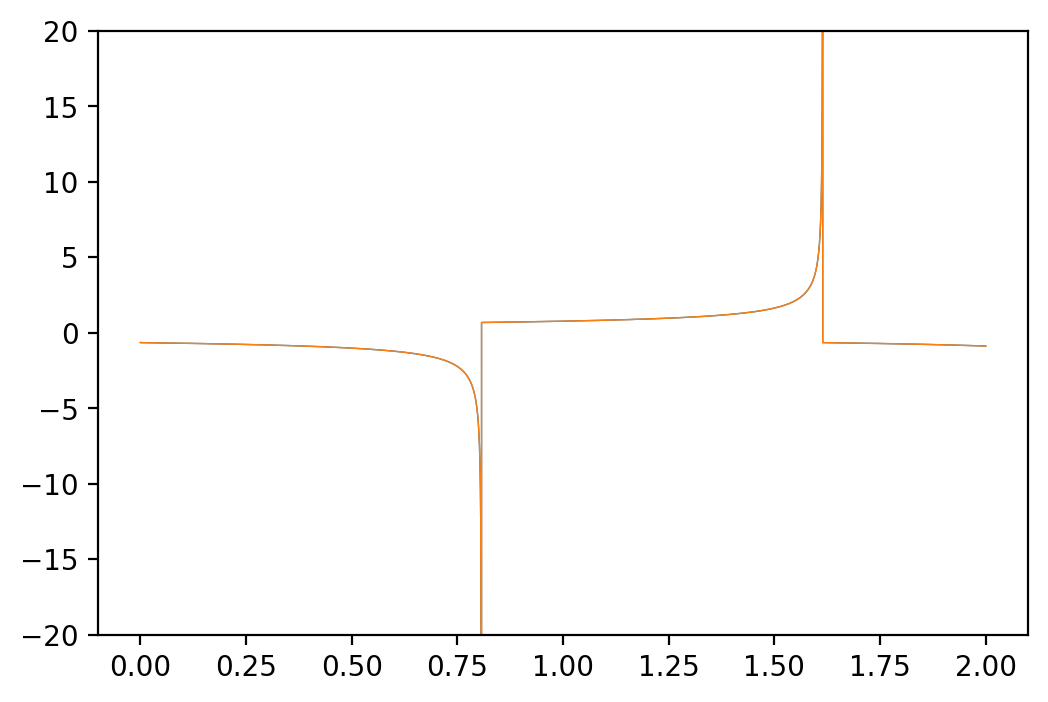

In [45]:
plt.figure(dpi=200)
plt.plot(test_data[:,0], sol.sol(test_data[:,0])[1], lw=0.5)
plt.plot(test_data[:,0], test_data[:,2],lw=0.5)
plt.ylim([-20,20])